# Проект Мастерская 1 

Ссылка на проект в GitHub: <br>
<a href=https://github.com/MStarostin/heart_workshop_1.git>https://github.com/MStarostin/heart_workshop_1.git</a>

## Вводная часть

### Описание проекта
В проекте разработана модель для предсказания риска сердечного приступа, используя данные пациентов, такие как возраст, привычки, состояние здоровья и результаты анализа крови, а также сделано для нее приложение на FastAPI для получения предсказаний по пользовательскому запросу.

Общая информация и цель проекта
* В проекте предполагается работа с датасетом из открытого источника.
* Требуется разработать модель машинного обучения,
* Подготовить библиотеку и интерфейс к ней для предсказания на тестовой выборке.
* В начале проекта доступен обучающий датасет и тестовый датасет, не содержащий правильных ответов.
* Метрика на тестовом датасете будет измерена в ходе проверки работы.
* Также будет доступен скрипт, с помощью которого будет измеряться финальная метрика вашей модели.

### Задачи проекта
Предполагается, что в ходе работы над проектом будут решены следующие задачи:
* Исследование датасета (предполагается поиск дополнительной информации для лучшего понимания природы данных)
* Предобработка данных. В данных могут быть бесполезные признаки, сильно скорелированные признаки а также косвенные утечки целевого признака. Некоторые колонки потребуется преобразовать к нужному типу данных.
* Обучение модели
* Подготовка предсказания на тестовой выборке.
* Файл предсказаний должен быть в csv формате и содержать 2 столбца: “id” и “prediction”. 
* Подготовка скриптов и библиотеки для обработки данных и предсказания на тестовой выборке
* Написание инструмента для тестирования
* Оформление документации

### Описание исходных данных
Данные пациентов для предсказания риска сердечных приступов
* id  - id
* Антропометрические параметры (вес, возраст, рост)
* Привычки (курение, качество сна и т.д)
* Давление
* Наличие хронических заболеваний
* Биохимия крови
* Таргет - высокий или низкий риск поражения сердца
  
Train
Test
Скрипт, которым будет тестироваться качество вашей модели

### Используемая метрика оценки качества и сравнения моделей
В ходе анализа датасетов предстоит определить наилучшую метрику оценки качества модели и обосновать выбор.

### Стек
Python (ООП)
Pandas
numpy
Scikitlearn
CatBoost
FastAPI
HTML

### Таймлайн проекта
Проект длится 2 недели и включает в себя:
Установочную встречу
Семинар по FastAPI + QA-сессия
Финальная встреча


### Ожидаемый результат
В результате должно получиться приложение на FastAPI которое принимает на вход путь к csv файлу тестовой выборки, выполняет предсказание (например, путем POST запроса к сервису) и возвращает ответ в формате JSON. Допускается для тестирования написать скрипт, который посылает запрос к запущенному ранее приложению, либо реализовать веб-интерфейс. 
Обратите внимание, что оцениваться будет помимо качества модели структурированность, понятность и чистота кода, архитектура приложения. Обязательным является использование ООП, то есть составные части приложения должны быть реализованы в виде классов. Проект должен быть оформлен в виде репозитория на github (gitlab), должна быть написана документация к сервису с описанием для пользователя и описанием классов и методов в приложении, как если бы далее ваш проект вы передавали пользователю. В jupiter ноутбуках могут быть только исследования и эксперименты, если демонстрацию результатов работы приложения вы также выносите в ноутбук - то кода приложения в ноутбуке быть не должно: он должен импортироваться в качестве внешних модулей.

### Формат сдачи работы
В репозитории должны быть:
- Jupiter Notebook с исследованием, обучением моделей и выводами
- Код вашего приложения
- Предсказание на тестовой выборке в требуемом формате
- Инструкция по запуску вашего приложения ИЛИ Jupiter Notebook с демонстрацией работы приложения ИЛИ выступление на финальной встрече где вы продемонстрируете работу приложения вживую
  
Критерии оценки
- Исследование и результаты обучения моделей
- Метрика на тестовой выборке (измеряется при проверке)
- Чистота кода и структурированность кода
- Оформление репозитория
- Воспроизводимость результатов

## Установка пакетов, Импорт библиотек, настройки, константы

### Установим отсутствуещие в окружении `practicum` пакеты

In [1]:
#!pip install -q -U scikit-learn==1.5.2
#!pip install -q shap
#!pip install -q optuna
#!pip install -q optuna-integration
#!pip install -q phik
#!pip install -q imbalanced-learn
#!pip install -U catboost

### Импорт библиотек

In [2]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, 
    StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder)

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score, accuracy_score, make_scorer

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from phik import phik_matrix
from phik.report import plot_correlation_matrix

from optuna import distributions
from optuna.integration import OptunaSearchCV
from optuna import visualization

from catboost import CatBoostClassifier, Pool

import shap

### Настройки по умолчанию

In [3]:
# Применим настройку формата чисел с разделителем
pd.options.display.float_format = '{:_.4f}'.format
# установим размер графиков по умолчанию
plt.rcParams["figure.figsize"] = (20, 15) 
# Установка опции для отображения максимальной ширины столбца
pd.set_option('display.max_colwidth', None)
# Установка опции для отображения всех столбцов
pd.set_option('display.max_columns', None)

### Константы

In [4]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

## Загрузка и подготовка данных
### Загружаем данные из файлов:
`heart_train.csv`
`heart_test.csv`

In [5]:
# Создаем переменные с датафреймами
try:
    df_heart_train = pd.read_csv('heart_train.csv')
    df_heart_test = pd.read_csv('heart_test.csv')
    
except FileNotFoundError:
    print("Ошибка: один или оба файла не найдены!")

### Обзор данных 

In [6]:
# функция вывода первых 5 строк датафрейма и информации о нем.
def head_info(df, rows=5):
    print(f'Первые {rows} строк и информация по датафрейму {df.attrs["name"]}: \n')
    display(df.head(rows))
    df.info()
    print()

In [7]:
df_names = {
    'df_heart_train': df_heart_train,
    'df_heart_test': df_heart_test
}
for name, df in df_names.items():
    df.attrs['name'] = name

In [8]:
df_all = [
    df_heart_train,
    df_heart_test
]

In [9]:
for df in df_all:
    head_info(df, 10)

Первые 10 строк и информация по датафрейму df_heart_train: 



Unnamed: 0    Age  Cholesterol  Heart rate  Diabetes  Family History  \
0           0 0.3596       0.7321      0.0742    1.0000          1.0000   
1           1 0.2022       0.3250      0.0477    1.0000          1.0000   
2           2 0.6067       0.8607      0.0559    1.0000          0.0000   
3           3 0.7303       0.0071      0.0532    0.0000          0.0000   
4           4 0.7753       0.7571      0.0220    0.0000          0.0000   
5           5 0.1685       0.7643      0.0577    0.0000          1.0000   
6           6 0.4831       0.0214      0.0367    1.0000          0.0000   
7           7 0.2360       0.9393      0.0816    1.0000          0.0000   
8           8 0.6854       0.3179      0.0394    0.0000          0.0000   
9           9 0.2135       0.7964      0.0770    1.0000          1.0000   

   Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  \
0   1.0000   1.0000               1.0000                   0.5355     1   
1   0.0000   0.0000               1.0000                   0.0687     2   
2   1.0000   1.0000               1.0000                   0.9440     2   
3   1.0000   0.0000               1.0000                   0.6970     0   
4   1.0000   0.0000               1.0000                   0.4129     1   
5   1.0000   1.0000               1.0000                   0.0827     1   
6   1.0000   0.0000               1.0000                   0.5402     2   
7   1.0000   0.0000               1.0000                   0.2908     2   
8   1.0000   0.0000               0.0000                   0.8032     0   
9   1.0000   1.0000               0.0000                   0.5070     1   

   Previous Heart Problems  Medication Use  Stress Level  \
0                   1.0000          0.0000        8.0000   
1                   1.0000          0.0000        9.0000   
2                   1.0000          1.0000        6.0000   
3                   0.0000          1.0000        3.0000   
4                   0.0000          0.0000        8.0000   
5                   1.0000          0.0000        7.0000   
6                   0.0000          1.0000        9.0000   
7                   0.0000          1.0000        7.0000   
8                   1.0000          1.0000        3.0000   
9                   0.0000          0.0000        7.0000   

   Sedentary Hours Per Day  Income    BMI  Triglycerides  \
0                   0.2257  0.1059 0.4592         0.9792   
1                   0.2899  0.1642 0.1171         0.5156   
2                   0.5501  0.5987 0.3736         0.0130   
3                   0.3310  0.0776 0.0497         0.1312   
4                   0.5246  0.3420 0.8304         0.0701   
5                   0.5583  0.6408 0.1106         0.2390   
6                   0.8276  0.7746 0.0737         0.0727   
7                   0.2253  0.9994 0.0015         0.1805   
8                   0.8282  0.1422 0.0931         0.9909   
9                   0.6930  0.8210 0.1454         0.1714   

   Physical Activity Days Per Week  Sleep Hours Per Day  \
0                           3.0000               0.3333   
1                           3.0000               0.8333   
2                           2.0000               1.0000   
3                           0.0000               0.3333   
4                           5.0000               1.0000   
5                           6.0000               0.8333   
6                           5.0000               0.0000   
7                           4.0000               0.0000   
8                           6.0000               0.1667   
9                           3.0000               1.0000   

   Heart Attack Risk (Binary)  Blood sugar  CK-MB  Troponin  Gender  \
0                      0.0000       0.2270 0.0482    0.0365    Male   
1                      0.0000       0.1502 0.0176    0.0002  Female   
2                      0.0000       0.2270 0.0482    0.0365  Female   
3                      1.0000       0.2270 0.0482    0.0365  Female   
4                      1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64
 12  Medication Use      

Unnamed: 0    Age  Cholesterol  Heart rate  Diabetes  Family History  \
0           0 0.4944       0.2643      0.0623    0.0000          1.0000   
1           1 0.2247       0.9536      0.0825    1.0000          0.0000   
2           2 0.6292       0.0929      0.0642    0.0000          1.0000   
3           3 0.4607       0.5679      0.0559    1.0000          1.0000   
4           4 0.7191       0.4857      0.0229    1.0000          0.0000   
5           5 0.5618       0.7929      0.0266    1.0000          1.0000   
6           6 0.6742       0.8536      0.0192    1.0000          1.0000   
7           7 0.5393       0.3357      0.0367    1.0000          1.0000   
8           8 0.4494       0.3286      0.0752    1.0000          0.0000   
9           9 0.6180       0.7286      0.0321    0.0000          1.0000   

   Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  \
0   1.0000   1.0000               1.0000                   0.3616     2   
1   0.0000   1.0000               0.0000                   0.9965     2   
2   1.0000   1.0000               0.0000                   0.9956     0   
3   1.0000   1.0000               1.0000                   0.4373     0   
4   1.0000   0.0000               1.0000                   0.5149     0   
5   1.0000   1.0000               0.0000                   0.7745     2   
6   1.0000   0.0000               1.0000                   0.1491     1   
7   1.0000   0.0000               1.0000                   0.3297     1   
8   1.0000   0.0000               0.0000                   0.4874     2   
9   1.0000   0.0000               0.0000                   0.2115     2   

   Previous Heart Problems  Medication Use  Stress Level  \
0                   0.0000          0.0000        8.0000   
1                   1.0000          1.0000        5.0000   
2                   0.0000          0.0000       10.0000   
3                   0.0000          0.0000       10.0000   
4                   0.0000          0.0000        7.0000   
5                   0.0000          1.0000        8.0000   
6                   0.0000          0.0000        8.0000   
7                   1.0000          0.0000        1.0000   
8                   1.0000          0.0000       10.0000   
9                   1.0000          1.0000        8.0000   

   Sedentary Hours Per Day  Income    BMI  Triglycerides  \
0                   0.1944  0.5878 0.2835         0.3065   
1                   0.3299  0.6029 0.4670         0.0870   
2                   0.7801  0.3704 0.4094         0.2052   
3                   0.7851  0.3682 0.9103         0.1636   
4                   0.0709  0.7296 0.7589         0.5805   
5                   0.0441  0.8135 0.7234         0.3623   
6                   0.3060  0.5625 0.6961         0.2117   
7                   0.3770  0.2351 0.4844         0.8351   
8                   0.0894  0.4866 0.4094         0.8195   
9                   0.5243  0.0839 0.6574         0.1961   

   Physical Activity Days Per Week  Sleep Hours Per Day  Blood sugar  CK-MB  \
0                           1.0000               0.3333       0.2270 0.0482   
1                           0.0000               0.1667       0.2270 0.0482   
2                           7.0000               1.0000       0.1028 0.0027   
3                           0.0000               0.6667       0.2036 0.0564   
4                           5.0000               0.0000       0.2270 0.0482   
5                           1.0000               0.6667       0.2270 0.0482   
6                           3.0000               0.0000       0.2270 0.0482   
7                           7.0000               0.6667       0.6957 0.0025   
8                           2.0000               0.1667       0.2270 0.0482   
9                           0.0000               1.0000       0.2270 0.0482   

   Troponin  Gender  Systolic blood pressure  Diastolic blood pressure    id  
0    0.0365    Male                   0.2839                    0.3721  7746  
1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       966 non-null    int64  
 1   Age                              966 non-null    float64
 2   Cholesterol                      966 non-null    float64
 3   Heart rate                       966 non-null    float64
 4   Diabetes                         935 non-null    float64
 5   Family History                   935 non-null    float64
 6   Smoking                          935 non-null    float64
 7   Obesity                          935 non-null    float64
 8   Alcohol Consumption              935 non-null    float64
 9   Exercise Hours Per Week          966 non-null    float64
 10  Diet                             966 non-null    int64  
 11  Previous Heart Problems          935 non-null    float64
 12  Medication Use        

- В датасете имеются явно лишние поля `Unnamed: 0` и `id` для обучения модели они не понадобятся.
- В датасете присутствуют пропуски.
- Часть признаков отмасштабированы

### Предобработка данных

#### Преобразованее столбцов
Приведем название стобцов в snake_case.

In [10]:
def to_snake_case(df):
    df.columns = [
    re.sub(r'[^a-z0-9_]', '',
           column_name.replace(' ', '_')
           .lower()
    )
    for column_name in df.columns
    ]
    return df

In [11]:
for df in df_all:
    to_snake_case(df)
    print(df.columns)

Index(['unnamed_0', 'age', 'cholesterol', 'heart_rate', 'diabetes',
       'family_history', 'smoking', 'obesity', 'alcohol_consumption',
       'exercise_hours_per_week', 'diet', 'previous_heart_problems',
       'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income',
       'bmi', 'triglycerides', 'physical_activity_days_per_week',
       'sleep_hours_per_day', 'heart_attack_risk_binary', 'blood_sugar',
       'ckmb', 'troponin', 'gender', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'id'],
      dtype='object')
Index(['unnamed_0', 'age', 'cholesterol', 'heart_rate', 'diabetes',
       'family_history', 'smoking', 'obesity', 'alcohol_consumption',
       'exercise_hours_per_week', 'diet', 'previous_heart_problems',
       'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income',
       'bmi', 'triglycerides', 'physical_activity_days_per_week',
       'sleep_hours_per_day', 'blood_sugar', 'ckmb', 'troponin', 'gender',
       'systolic_blood

Избавимся от полей  Unnamed: 0 `unnamed_0` 

In [12]:
df_heart_train = df_heart_train.drop(columns=['unnamed_0'])

#### Устранение дубликатов

Проверим на артефакты в строковых значениях

In [13]:
def unique_cat_values(df):
    str_col_names = df.select_dtypes(exclude='number').columns.tolist()
    print(f'Уникальные значения в датафрейме {df.attrs["name"]}:')
    for col_name in str_col_names:
        display(pd.DataFrame({col_name: df[col_name].unique()}))
    print()
    return 

In [14]:
for df in df_all:
    unique_cat_values(df)

Уникальные значения в датафрейме df_heart_train:


gender
0    Male
1  Female
2     1.0
3     0.0


Уникальные значения в датафрейме df_heart_test:


gender
0    Male
1  Female
2     1.0
3     0.0

Часть данных в поле gender закодировано, часть нет

Провеяем на полные дубликаты и id на уникальность

In [15]:
def check_duplecates(df, column, name=''):
    full_dupplicats = df.duplicated().sum()
    print(f'Датафрейм: {name}')
    print(f'Полных дубликатаов:{full_dupplicats}') 
    duplicates_in_column = df[column].duplicated().sum()
    print(f'Дубликатаов в {column}: {duplicates_in_column}')
    if duplicates_in_column > 0:
        value_counts = df[column].value_counts()
        filtered_values = value_counts[value_counts > 1]
        print(filtered_values)
        display(df[df.duplicated(column, keep=False)])
    return

In [16]:
check_duplecates(df_heart_train, 'id', name)

Датафрейм: df_heart_test
Полных дубликатаов:0
Дубликатаов в id: 0


In [17]:
# преобразование id в индексы
df_heart_train = df_heart_train.set_index('id')

Проверим как выглядят строки с пропусками:

In [18]:
df_heart_train[df_heart_train.isna().any(axis=1)].head(10)

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
id                                                                        
9528 0.4494       0.4998      0.0632       NaN             NaN      NaN   
9640 0.3708       0.4998      0.0669       NaN             NaN      NaN   
9515 0.6292       0.4998      0.0733       NaN             NaN      NaN   
9491 0.5169       0.4998      0.0458       NaN             NaN      NaN   
9448 0.2697       0.4998      0.0357       NaN             NaN      NaN   
9594 0.6742       0.4998      0.0651       NaN             NaN      NaN   
9570 0.6292       0.4998      0.0843       NaN             NaN      NaN   
9649 0.3708       0.4998      0.0678       NaN             NaN      NaN   
9625 0.4157       0.4998      0.0568       NaN             NaN      NaN   
9574 0.4045       0.4998      0.1027       NaN             NaN      NaN   

      obesity  alcohol_consumption  exercise_hours_per_week  diet  \
id                                                                  
9528      NaN                  NaN                   0.5021     3   
9640      NaN                  NaN                   0.5021     3   
9515      NaN                  NaN                   0.5021     3   
9491      NaN                  NaN                   0.5021     3   
9448      NaN                  NaN                   0.5021     3   
9594      NaN                  NaN                   0.5021     3   
9570      NaN                  NaN                   0.5021     3   
9649      NaN                  NaN                   0.5021     3   
9625      NaN                  NaN                   0.5021     3   
9574      NaN                  NaN                   0.5021     3   

      previous_heart_problems  medication_use  stress_level  \
id                                                            
9528                      NaN             NaN           NaN   
9640                      NaN             NaN           NaN   
9515                      NaN             NaN           NaN   
9491                      NaN             NaN           NaN   
9448                      NaN             NaN           NaN   
9594                      NaN             NaN           NaN   
9570                      NaN             NaN           NaN   
9649                      NaN             NaN           NaN   
9625                      NaN             NaN           NaN   
9574                      NaN             NaN           NaN   

      sedentary_hours_per_day  income    bmi  triglycerides  \
id                                                            
9528                   0.4999  0.4949 0.4948         0.5036   
9640                   0.4999  0.4949 0.4948         0.5036   
9515                   0.4999  0.4949 0.4948         0.5036   
9491                   0.4999  0.4949 0.4948         0.5036   
9448                   0.4999  0.4949 0.4948         0.5036   
9594                   0.4999  0.4949 0.4948         0.5036   
9570                   0.4999  0.4949 0.4948         0.5036   
9649                   0.4999  0.4949 0.4948         0.5036   
9625                   0.4999  0.4949 0.4948         0.5036   
9574                   0.4999  0.4949 0.4948         0.5036   

      physical_activity_days_per_week  sleep_hours_per_day  \
id                                                           
9528                              NaN               0.5046   
9640                              NaN               0.5046   
9515                              NaN               0.5046   
9491                              NaN               0.5046   
9448                              NaN               0.5046   
9594                              NaN               0.5046   
9570                              NaN               0.5046   
9649                              NaN               0.5046   
9625                              NaN               0.5046   
9574                              NaN               0.5046   

      heart_attack_

У части пациентов отсутсвуют данные в полях: diabetes, family_history, smoking, obesity, alcohol_consumption, previous_heart_problems, medication_use, stress_level, physical_activity_days_per_week. Данные в этих полях закодированы 0 и 1 заполним пропуски значением 2

In [19]:
df_full = df_heart_train.copy()
df_clean = df_heart_train.copy()
df_short = df_heart_train[df_heart_train.isna().any(axis=1)]

In [20]:
df_full = df_full.fillna(2)

In [21]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8685 entries, 2664 to 7270
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8685 non-null   float64
 1   cholesterol                      8685 non-null   float64
 2   heart_rate                       8685 non-null   float64
 3   diabetes                         8685 non-null   float64
 4   family_history                   8685 non-null   float64
 5   smoking                          8685 non-null   float64
 6   obesity                          8685 non-null   float64
 7   alcohol_consumption              8685 non-null   float64
 8   exercise_hours_per_week          8685 non-null   float64
 9   diet                             8685 non-null   int64  
 10  previous_heart_problems          8685 non-null   float64
 11  medication_use                   8685 non-null   float64
 12  stress_level          

### Исследовательский анализ данных

Проведем исследовательский анализ данных таблиыцы df_heart_train. 

In [22]:
def plot_hist_box(column, bins=11, rot=0, name=''):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    column.plot(kind='hist', bins=bins, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    axes[0].set_xlabel(f'Значение {column.name} {name}') 
    axes[0].set_ylabel('Частота')
    column.plot(kind='box', ax=axes[1], rot=rot)
    axes[1].set_title('Разброс значений признакa')
    axes[1].set_ylabel('Значение')
    fig.suptitle(f'Анализ распределения значений {column.name}'
                 f' {name}', fontweight='bold')
    plt.show()
    print(f'\nОписательная статистика {column.name}:')
    print(column.describe())
    return

In [23]:
def plot_bar_pie(column, rot=0, name=''):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    counts = column.value_counts().sort_index()
    counts.plot(kind='bar', ax=axes[0], rot=rot)
    axes[0].set_title('Распределение в штуках')
    axes[0].set_xlabel(f'Значение {column.name} {name}') 
    axes[0].set_ylabel('количество')
    counts.plot(kind='pie', ax=axes[1], rot=rot, autopct='%1.1f%%')
    axes[1].set_title('Распределение в %')
    axes[1].set_ylabel('')
    fig.suptitle(f'Распределения значений {column.name}'
                 f' {name}', fontweight='bold')
    plt.show()
    print(f'\nОписательная статистика {column.name}:')
    print(column.describe())
    return

In [24]:
def plot_bar(column, rot=0, name=''):
    fig, ax = plt.subplots(figsize=(12,5))
    counts = column.value_counts().sort_index()
    counts.plot(kind='bar', ax=ax, rot=rot)
    ax.set_xlabel(f'Значение {column.name} {name}') 
    ax.set_ylabel('количество')
    ax.grid(axis='y', alpha=0.5)
    fig.suptitle(f'Распределение значений {column.name}'
                 f'{name}', fontweight='bold')
    plt.show()
    print(f'\nОписательная статистика {column.name}:')
    print(column.describe())
    return

In [25]:
num_columns = (
    'age',
    'cholesterol',
    'heart_rate',
    'exercise_hours_per_week',
    'sedentary_hours_per_day',
    'income',
    'bmi',
    'triglycerides',
    'blood_sugar',
    'ckmb',
    'troponin',
    'systolic_blood_pressure',
    'diastolic_blood_pressure',
    'sleep_hours_per_day'
)

cat_columns = (
    'diabetes',
    'family_history',
    'smoking',
    'obesity',
    'alcohol_consumption',
    'diet',
    'previous_heart_problems',
    'medication_use',
    'stress_level',
    'physical_activity_days_per_week',
    'heart_attack_risk_binary',
    'gender'
)

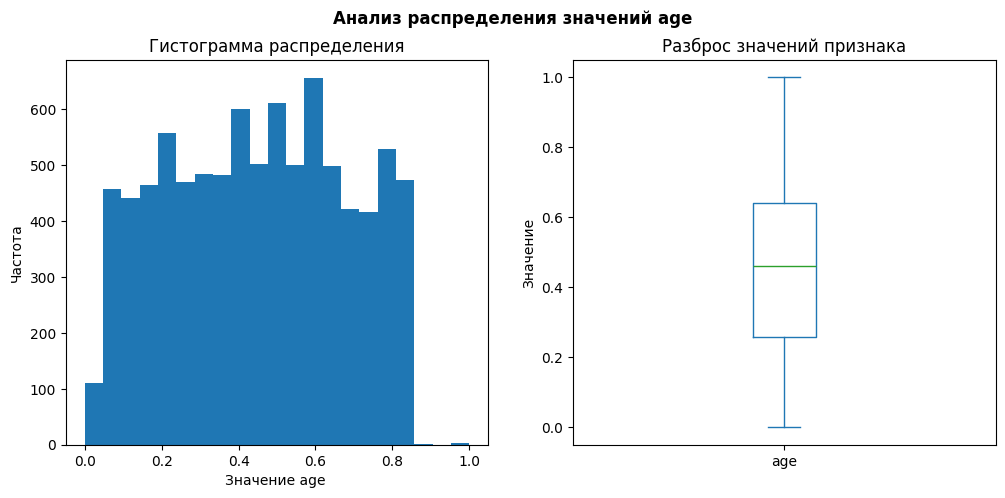


Описательная статистика age:
count   8_685.0000
mean        0.4500
std         0.2312
min         0.0000
25%         0.2584
50%         0.4607
75%         0.6404
max         1.0000
Name: age, dtype: float64


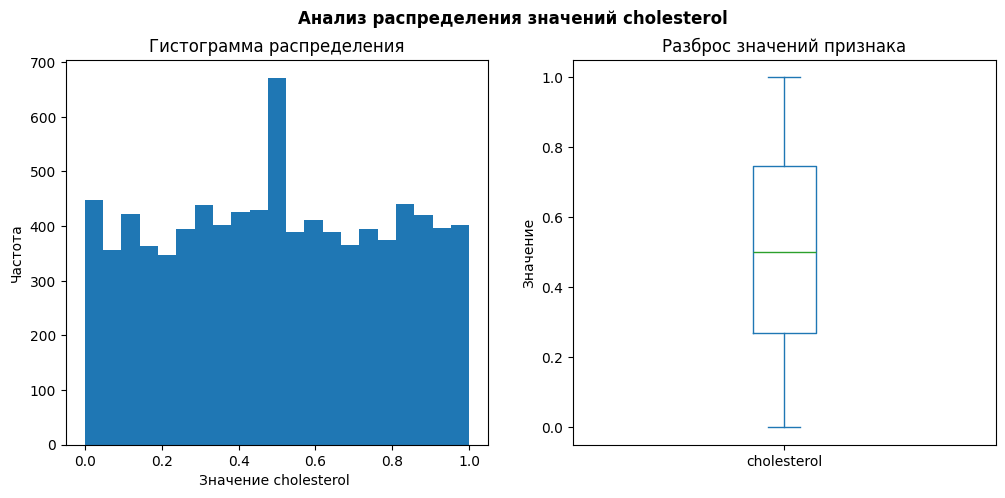


Описательная статистика cholesterol:
count   8_685.0000
mean        0.5011
std         0.2847
min         0.0000
25%         0.2679
50%         0.4998
75%         0.7464
max         1.0000
Name: cholesterol, dtype: float64


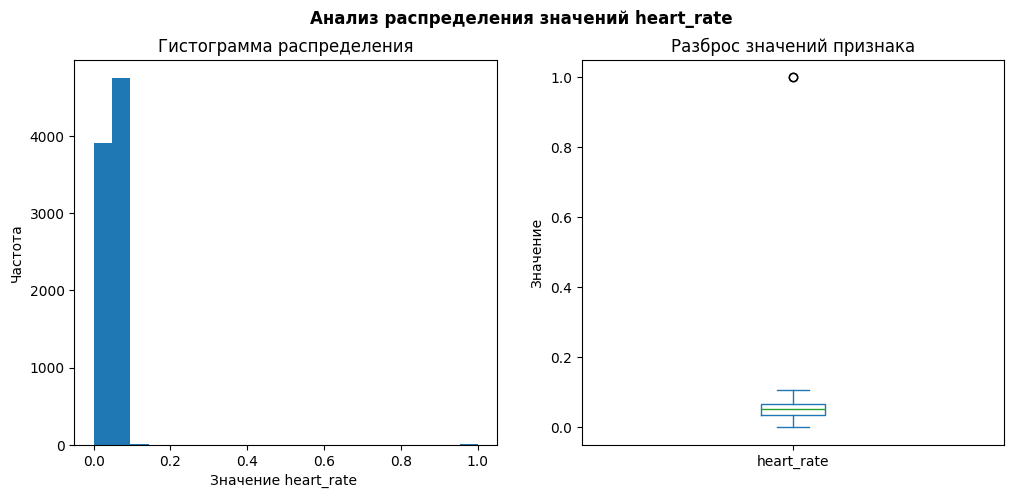


Описательная статистика heart_rate:
count   8_685.0000
mean        0.0507
std         0.0235
min         0.0000
25%         0.0348
50%         0.0504
75%         0.0660
max         1.0000
Name: heart_rate, dtype: float64


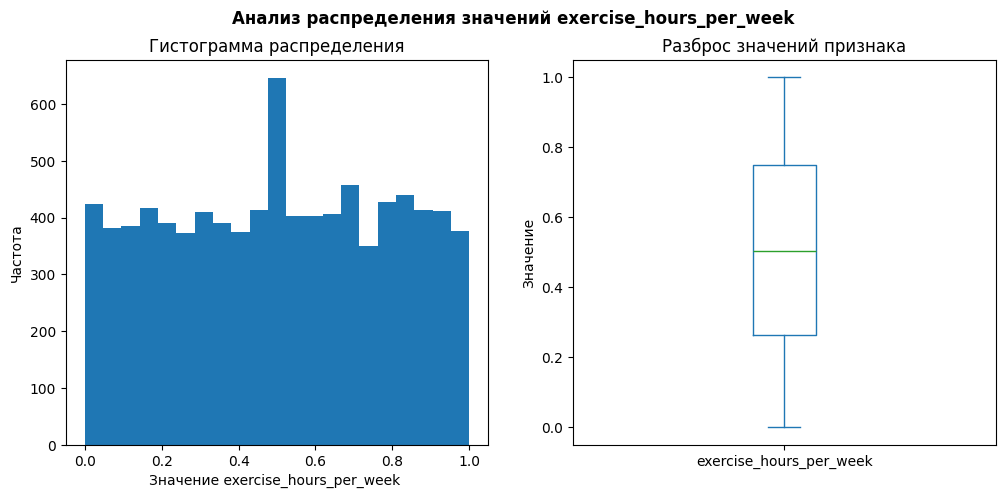


Описательная статистика exercise_hours_per_week:
count   8_685.0000
mean        0.5034
std         0.2848
min         0.0000
25%         0.2633
50%         0.5021
75%         0.7487
max         1.0000
Name: exercise_hours_per_week, dtype: float64


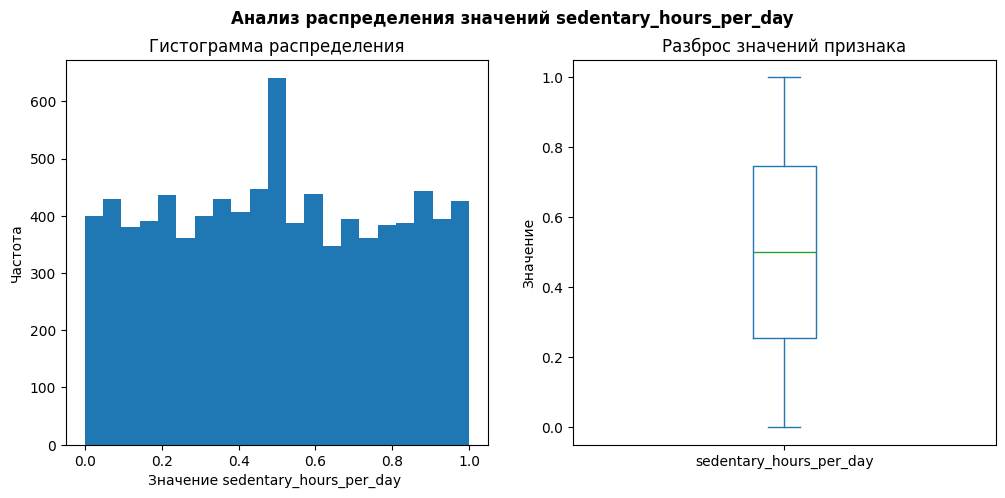


Описательная статистика sedentary_hours_per_day:
count   8_685.0000
mean        0.4992
std         0.2853
min         0.0000
25%         0.2559
50%         0.4999
75%         0.7446
max         1.0000
Name: sedentary_hours_per_day, dtype: float64


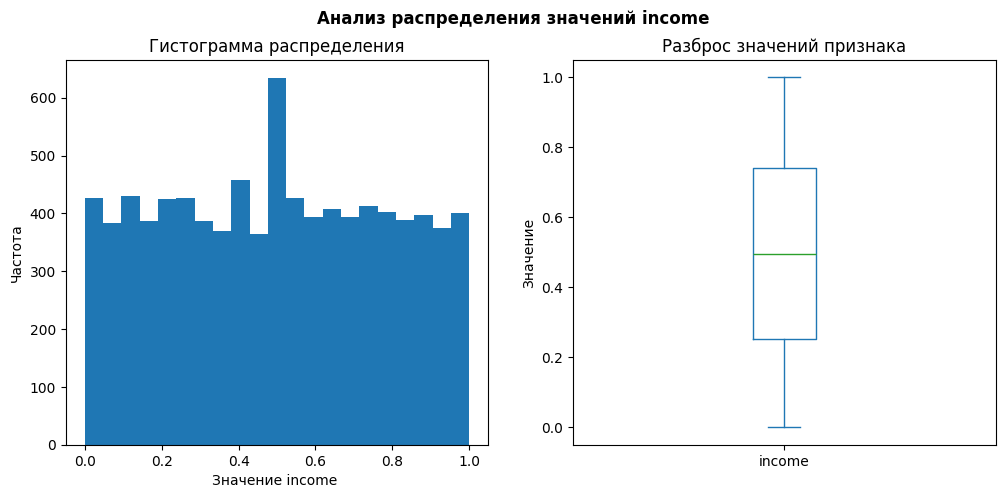


Описательная статистика income:
count   8_685.0000
mean        0.4961
std         0.2847
min         0.0000
25%         0.2519
50%         0.4949
75%         0.7410
max         1.0000
Name: income, dtype: float64


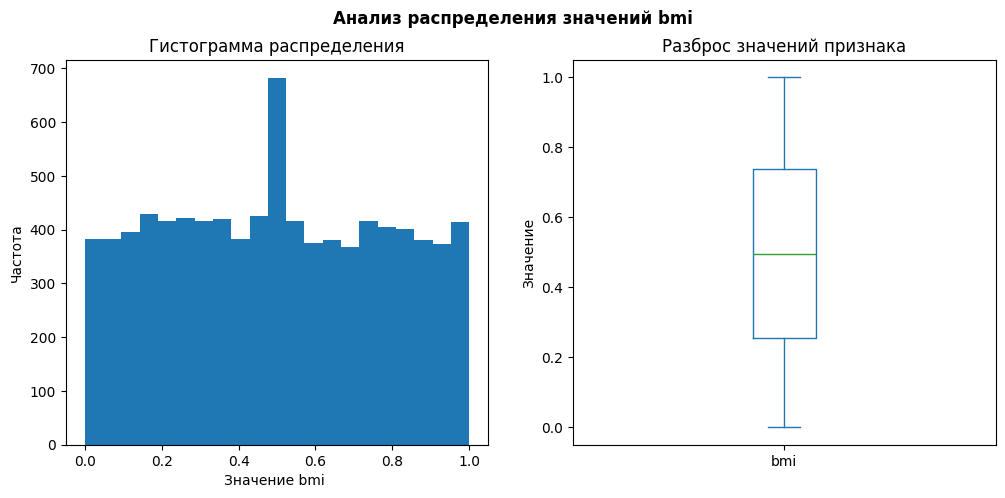


Описательная статистика bmi:
count   8_685.0000
mean        0.4968
std         0.2826
min         0.0000
25%         0.2542
50%         0.4948
75%         0.7370
max         1.0000
Name: bmi, dtype: float64


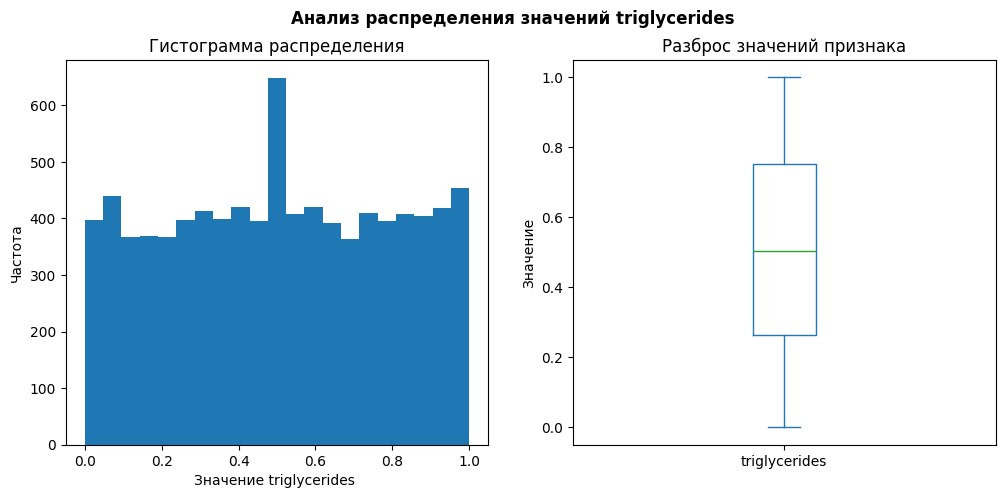


Описательная статистика triglycerides:
count   8_685.0000
mean        0.5055
std         0.2863
min         0.0000
25%         0.2636
50%         0.5036
75%         0.7506
max         1.0000
Name: triglycerides, dtype: float64


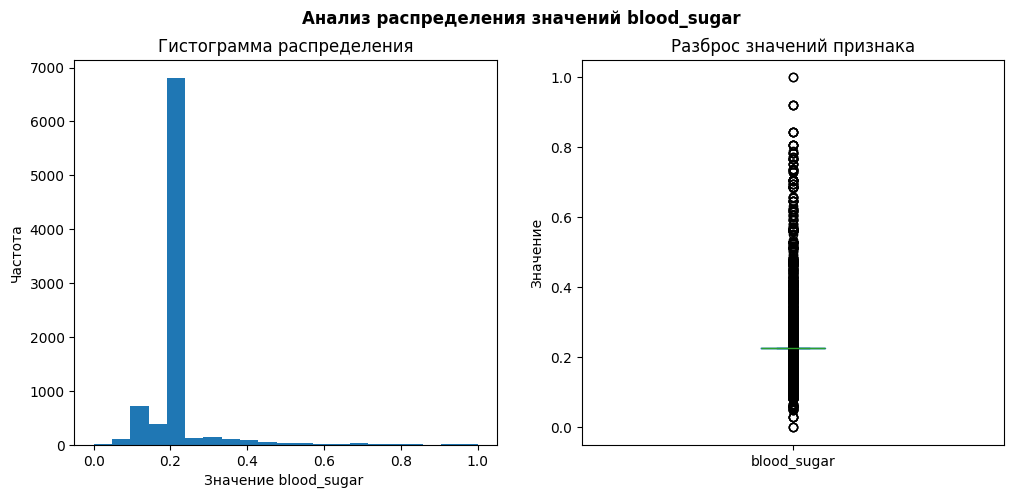


Описательная статистика blood_sugar:
count   8_685.0000
mean        0.2273
std         0.0766
min         0.0000
25%         0.2270
50%         0.2270
75%         0.2270
max         1.0000
Name: blood_sugar, dtype: float64


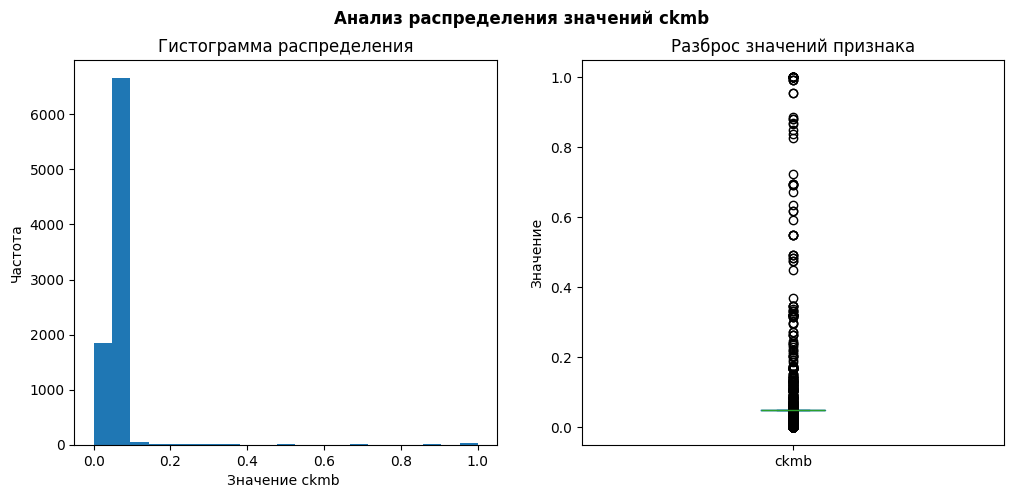


Описательная статистика ckmb:
count   8_685.0000
mean        0.0482
std         0.0755
min         0.0000
25%         0.0482
50%         0.0482
75%         0.0482
max         1.0000
Name: ckmb, dtype: float64


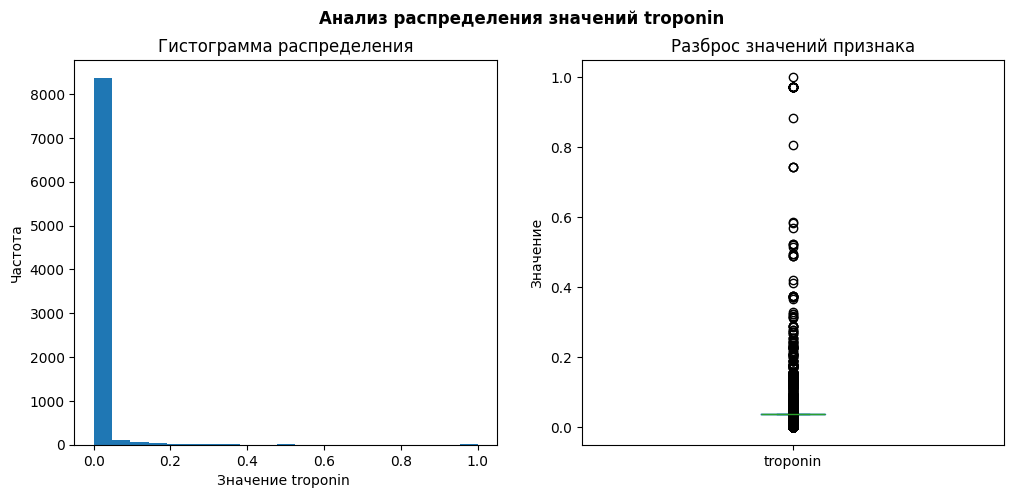


Описательная статистика troponin:
count   8_685.0000
mean        0.0367
std         0.0602
min         0.0000
25%         0.0365
50%         0.0365
75%         0.0365
max         1.0000
Name: troponin, dtype: float64


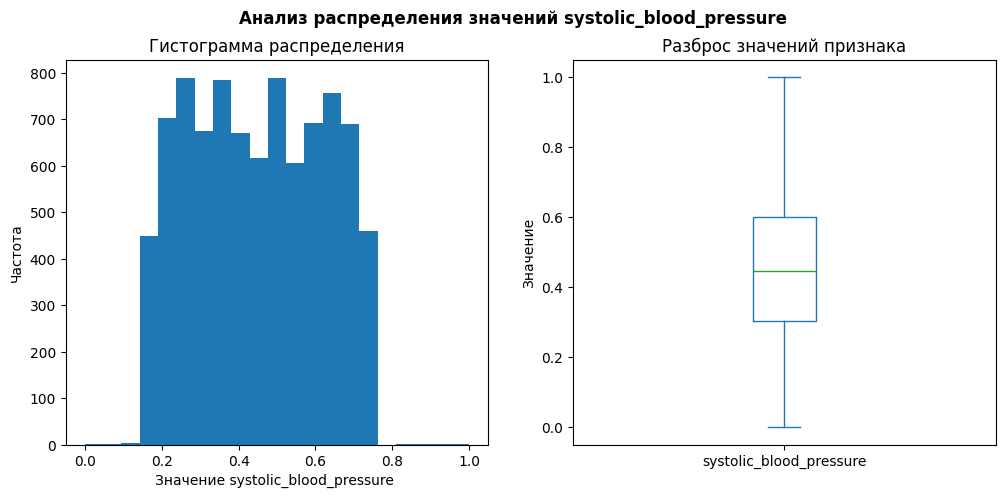


Описательная статистика systolic_blood_pressure:
count   8_685.0000
mean        0.4503
std         0.1702
min         0.0000
25%         0.3032
50%         0.4452
75%         0.6000
max         1.0000
Name: systolic_blood_pressure, dtype: float64


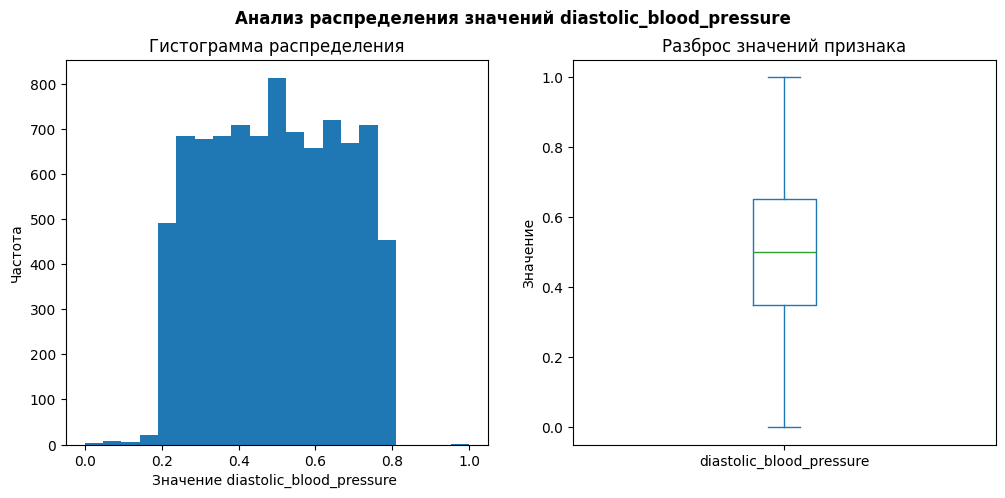


Описательная статистика diastolic_blood_pressure:
count   8_685.0000
mean        0.4976
std         0.1718
min         0.0000
25%         0.3488
50%         0.5000
75%         0.6512
max         1.0000
Name: diastolic_blood_pressure, dtype: float64


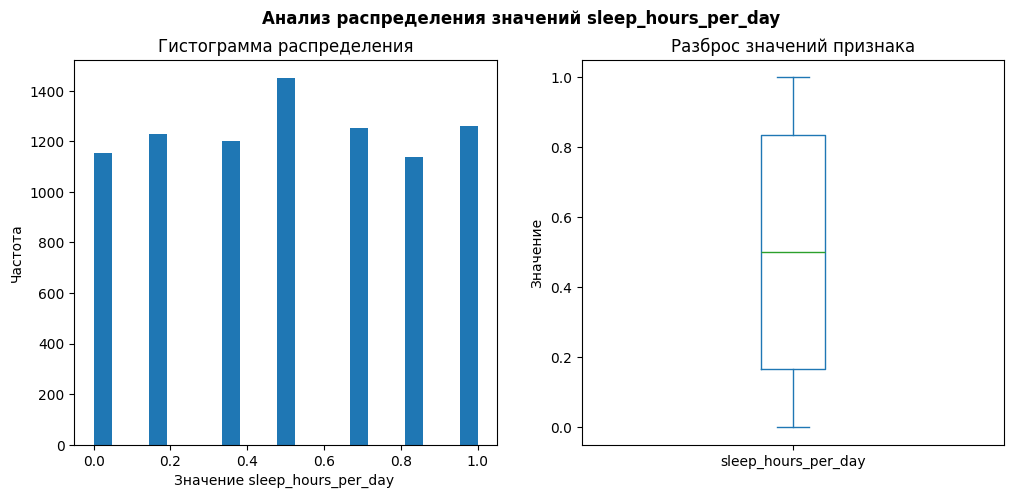


Описательная статистика sleep_hours_per_day:
count   8_685.0000
mean        0.5037
std         0.3281
min         0.0000
25%         0.1667
50%         0.5000
75%         0.8333
max         1.0000
Name: sleep_hours_per_day, dtype: float64


In [26]:
for column in num_columns:
    plot_hist_box(df_full[column], bins=21)

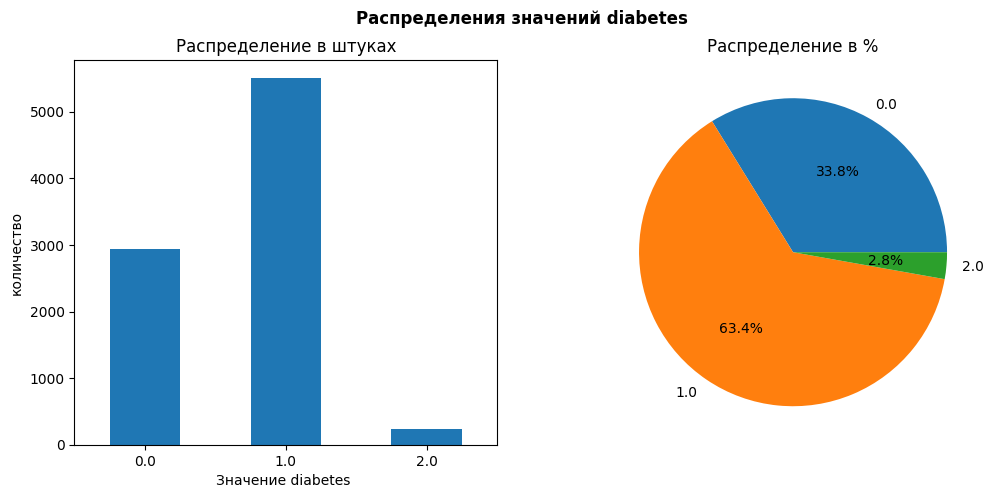


Описательная статистика diabetes:
count   8_685.0000
mean        0.6898
std         0.5196
min         0.0000
25%         0.0000
50%         1.0000
75%         1.0000
max         2.0000
Name: diabetes, dtype: float64


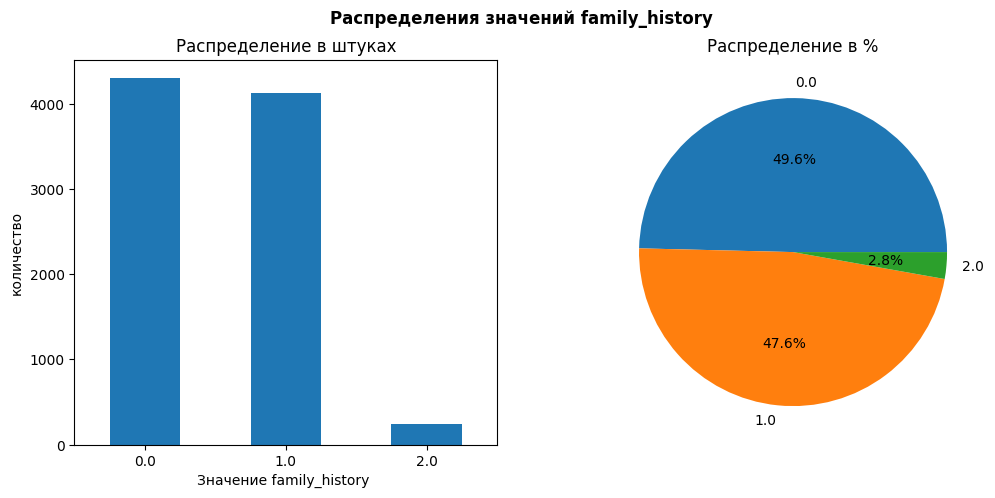


Описательная статистика family_history:
count   8_685.0000
mean        0.5318
std         0.5523
min         0.0000
25%         0.0000
50%         1.0000
75%         1.0000
max         2.0000
Name: family_history, dtype: float64


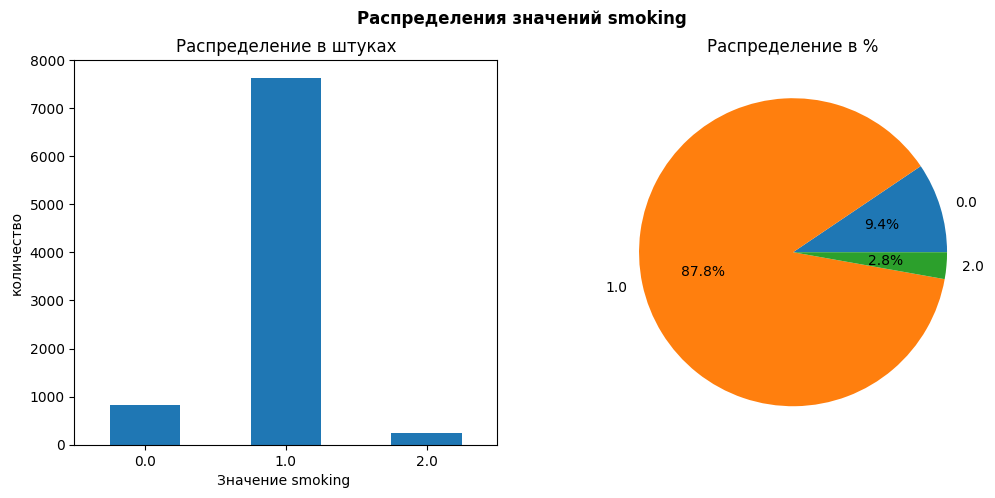


Описательная статистика smoking:
count   8_685.0000
mean        0.9336
std         0.3435
min         0.0000
25%         1.0000
50%         1.0000
75%         1.0000
max         2.0000
Name: smoking, dtype: float64


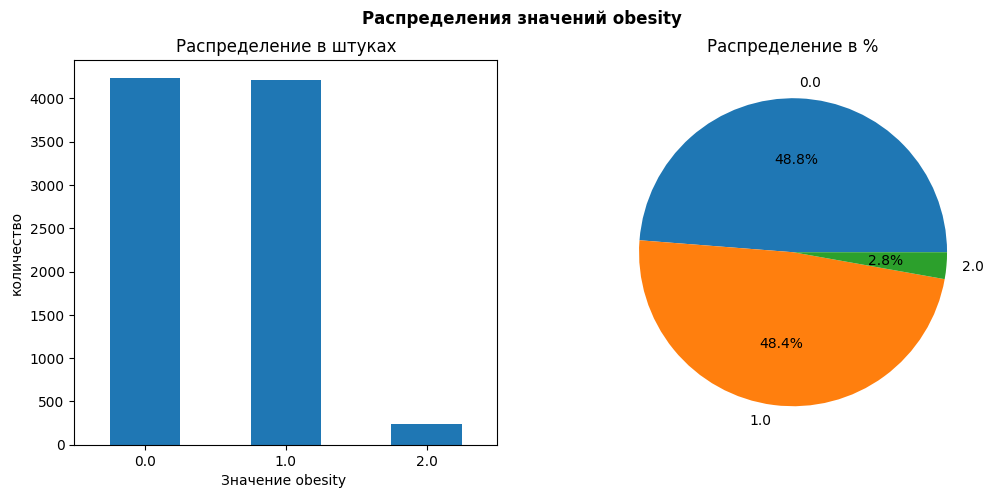


Описательная статистика obesity:
count   8_685.0000
mean        0.5404
std         0.5517
min         0.0000
25%         0.0000
50%         1.0000
75%         1.0000
max         2.0000
Name: obesity, dtype: float64


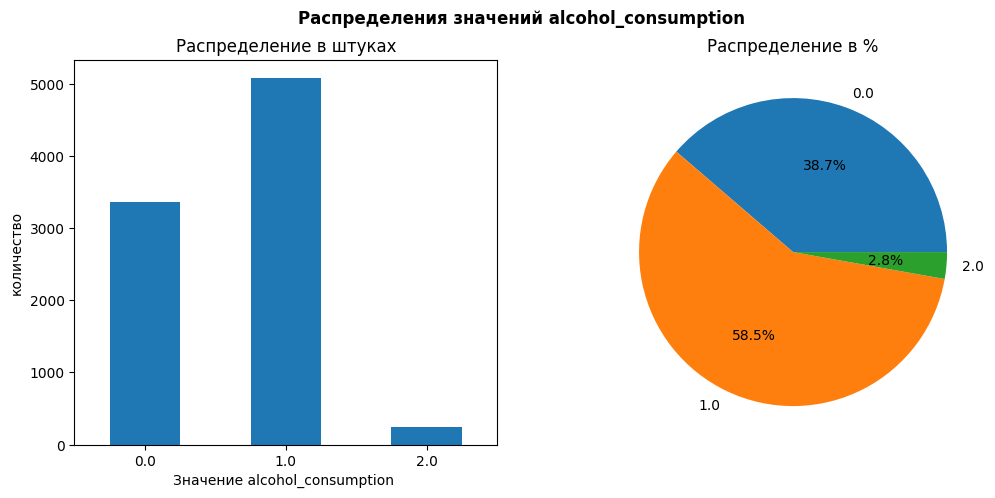


Описательная статистика alcohol_consumption:
count   8_685.0000
mean        0.6411
std         0.5349
min         0.0000
25%         0.0000
50%         1.0000
75%         1.0000
max         2.0000
Name: alcohol_consumption, dtype: float64


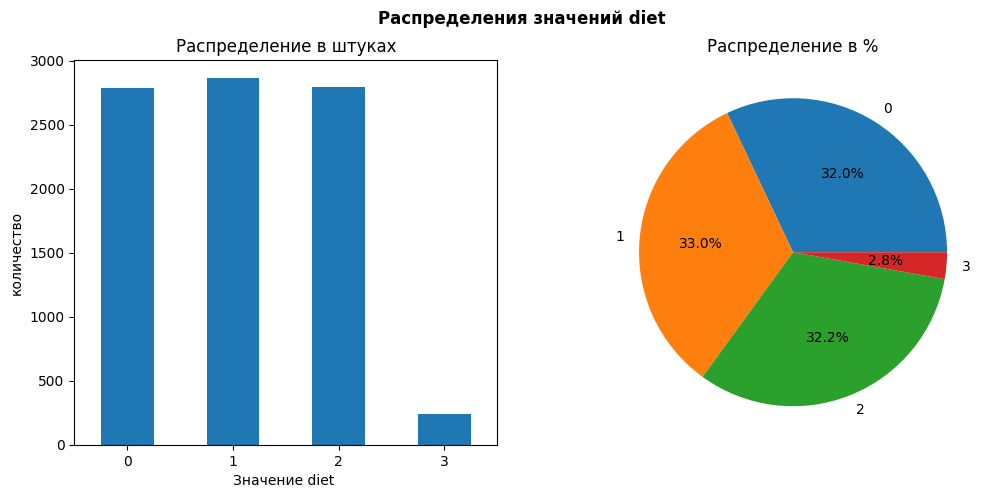


Описательная статистика diet:
count   8_685.0000
mean        1.0575
std         0.8666
min         0.0000
25%         0.0000
50%         1.0000
75%         2.0000
max         3.0000
Name: diet, dtype: float64


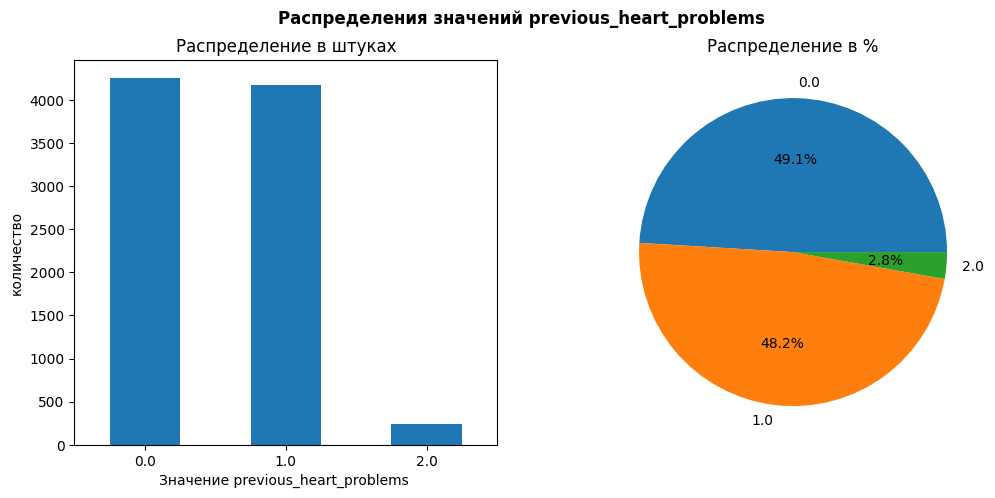


Описательная статистика previous_heart_problems:
count   8_685.0000
mean        0.5375
std         0.5519
min         0.0000
25%         0.0000
50%         1.0000
75%         1.0000
max         2.0000
Name: previous_heart_problems, dtype: float64


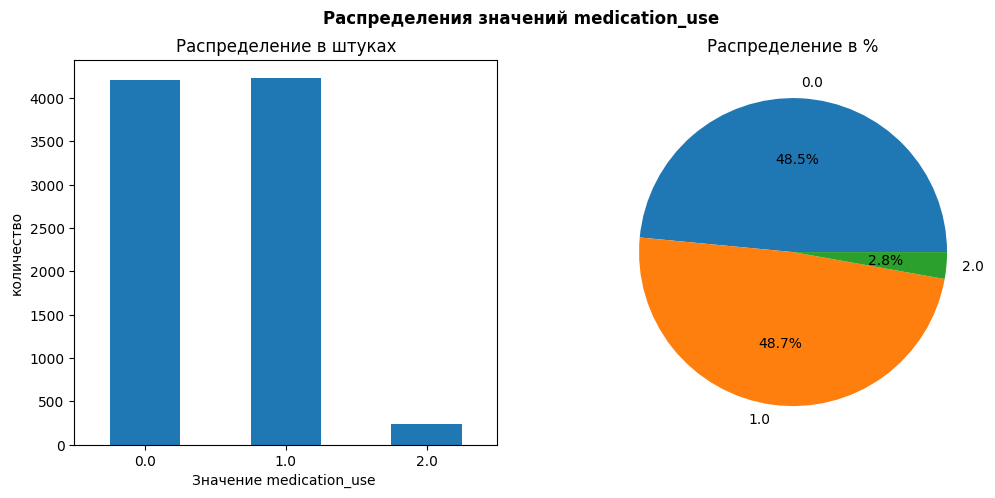


Описательная статистика medication_use:
count   8_685.0000
mean        0.5431
std         0.5515
min         0.0000
25%         0.0000
50%         1.0000
75%         1.0000
max         2.0000
Name: medication_use, dtype: float64


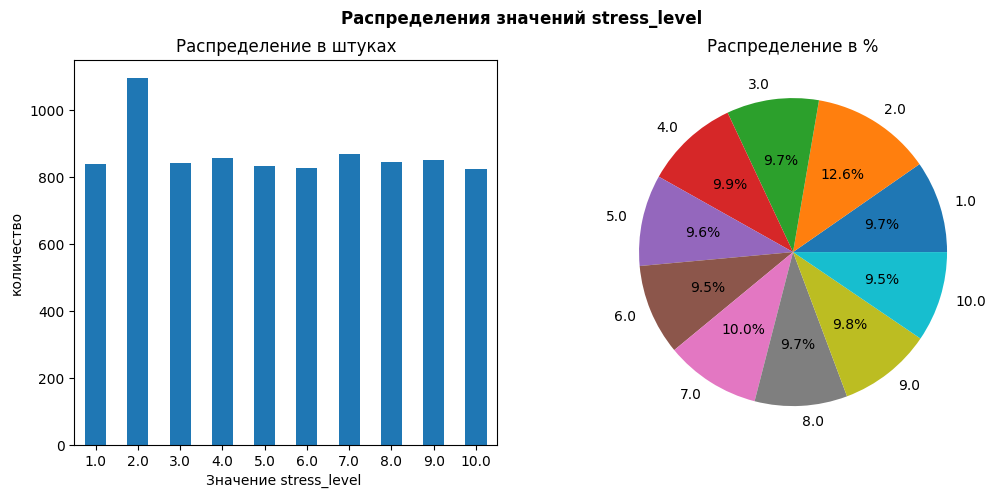


Описательная статистика stress_level:
count   8_685.0000
mean        5.3956
std         2.8856
min         1.0000
25%         3.0000
50%         5.0000
75%         8.0000
max        10.0000
Name: stress_level, dtype: float64


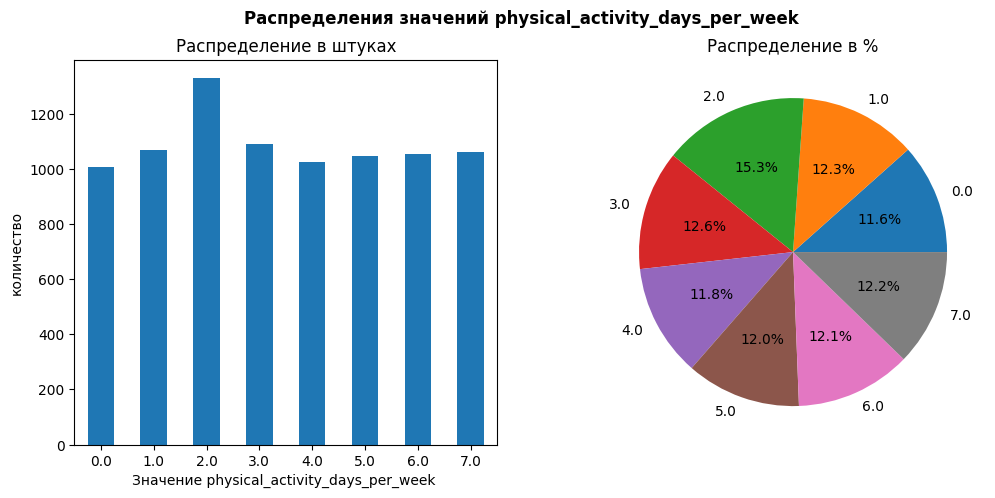


Описательная статистика physical_activity_days_per_week:
count   8_685.0000
mean        3.4661
std         2.2633
min         0.0000
25%         2.0000
50%         3.0000
75%         5.0000
max         7.0000
Name: physical_activity_days_per_week, dtype: float64


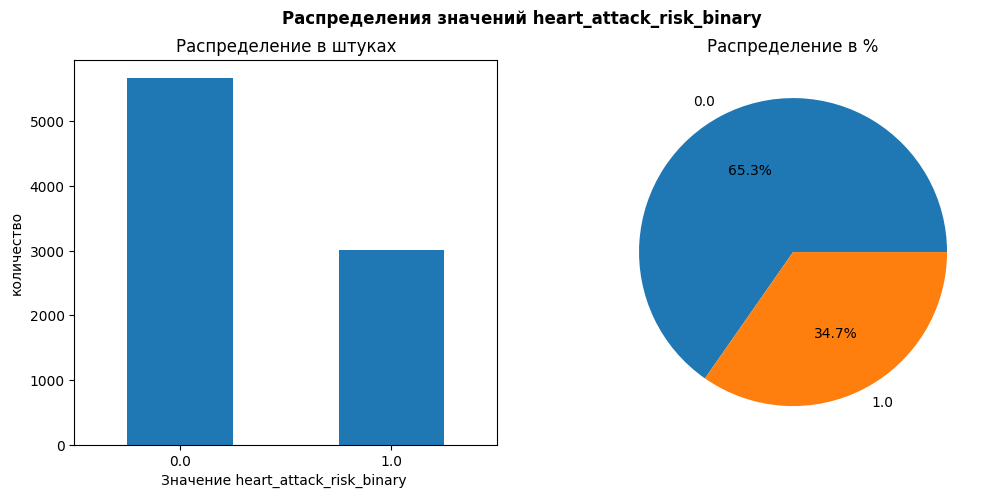


Описательная статистика heart_attack_risk_binary:
count   8_685.0000
mean        0.3469
std         0.4760
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: heart_attack_risk_binary, dtype: float64


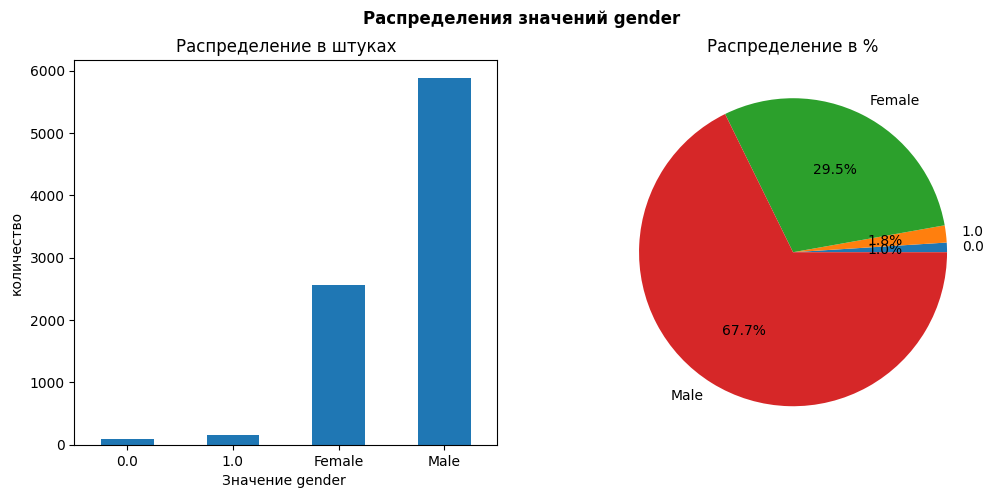


Описательная статистика gender:
count     8685
unique       4
top       Male
freq      5882
Name: gender, dtype: object


In [27]:
for column in cat_columns:
    plot_bar_pie(df_full[column])

    - 'age' - данные масштабированы
    - 'heart_rate' - выброс
    - 'diabetes' - категориальный закодированный
    - 'family_history' - категориальный закодированный
    - 'smoking' - категориальный закодированный
    - 'obesity' - категориальный закодированный
    - 'alcohol_consumption' - категориальный закодированный
    - 'previous_heart_problems' - категориальный закодированный
    - 'medication_use' - категориальный закодированный
    - 'stress_level' - категориальный закодированный
    - 'physical_activity_days_per_week' - категориальный закодированный
    - 'heart_attack_risk_binary' - категориальный закодированный целувой признак
    - 'gender' категориальный часть данных закодирована

In [28]:
df_full.query('heart_rate > 0.2')

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
id                                                                        
9547 0.6292       0.4998      1.0000    2.0000          2.0000   2.0000   
9611 0.2022       0.4998      1.0000    2.0000          2.0000   2.0000   

      obesity  alcohol_consumption  exercise_hours_per_week  diet  \
id                                                                  
9547   2.0000               2.0000                   0.5021     3   
9611   2.0000               2.0000                   0.5021     3   

      previous_heart_problems  medication_use  stress_level  \
id                                                            
9547                   2.0000          2.0000        2.0000   
9611                   2.0000          2.0000        2.0000   

      sedentary_hours_per_day  income    bmi  triglycerides  \
id                                                            
9547                   0.4999  0.4949 0.4948         0.5036   
9611                   0.4999  0.4949 0.4948         0.5036   

      physical_activity_days_per_week  sleep_hours_per_day  \
id                                                           
9547                           2.0000               0.5046   
9611                           2.0000               0.5046   

      heart_attack_risk_binary  blood_sugar   ckmb  troponin gender  \
id                                                                    
9547                    0.0000       0.2036 0.0118    0.0026    0.0   
9611                    0.0000       0.0929 0.0078    0.0007    0.0   

      systolic_blood_pressure  diastolic_blood_pressure  
id                                                       
9547                   0.4903                    0.6163  
9611                   0.4903                    0.6163

Скорее всего при масштабировании данных не был обработан выброс. Можем его удалить, но более предпочтительным выгдядет использовать модель не чувствительную к вбросам. Для целей определения корркляций избавимся от выбросов

In [29]:
df_clean = df_clean.query('heart_rate < 0.2')

In [30]:
df_clean = df_clean.dropna()

Проиведем строковые занчени gender к 1 и 0

In [31]:
df_clean['gender'] = df_clean['gender'].replace({'Male': 1, 'Female': 0})
df_clean['gender'] = pd.to_numeric(df_clean['gender'])

/var/folders/ry/vnlhmx2d5p55tv0jybdz7w5m0000gn/T/ipykernel_20341/1518845617.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['gender'] = df_clean['gender'].replace({'Male': 1, 'Female': 0})


In [32]:
df_full['gender'] = df_full['gender'].replace({'Male': 1, 'Female': 0})
df_full['gender'] = pd.to_numeric(df_full['gender'])

In [33]:
#df_clean['gender'].loc[df_clean['gender'] == 'Male'] = 1
#df_clean['gender'].loc[df_clean['gender'] == 'Female'] = 0

In [34]:
df_clean = df_clean.astype({
    'diabetes': 'int',
    'family_history': 'int',
    'smoking': 'int',
    'obesity': 'int',
    'alcohol_consumption': 'int',
    'previous_heart_problems': 'int',
    'medication_use': 'int',
    'stress_level': 'int',
    'physical_activity_days_per_week': 'int',
    'heart_attack_risk_binary': 'int',
    'gender': 'int'
})

In [35]:
df_clean['gender'] = pd.to_numeric(df_clean['gender'])

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8442 entries, 2664 to 7270
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              8442 non-null   float64
 1   cholesterol                      8442 non-null   float64
 2   heart_rate                       8442 non-null   float64
 3   diabetes                         8442 non-null   int64  
 4   family_history                   8442 non-null   int64  
 5   smoking                          8442 non-null   int64  
 6   obesity                          8442 non-null   int64  
 7   alcohol_consumption              8442 non-null   int64  
 8   exercise_hours_per_week          8442 non-null   float64
 9   diet                             8442 non-null   int64  
 10  previous_heart_problems          8442 non-null   int64  
 11  medication_use                   8442 non-null   int64  
 12  stress_level          

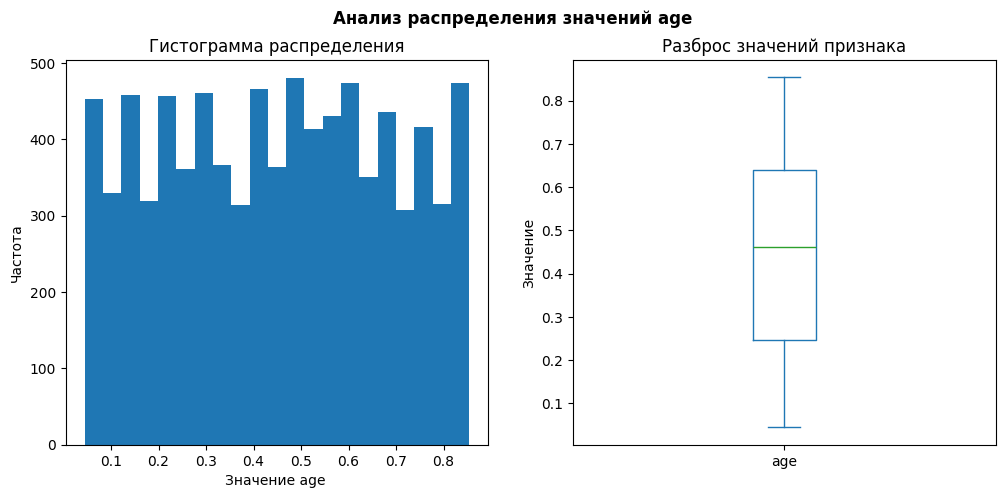


Описательная статистика age:
count   8_442.0000
mean        0.4490
std         0.2328
min         0.0449
25%         0.2472
50%         0.4607
75%         0.6404
max         0.8539
Name: age, dtype: float64


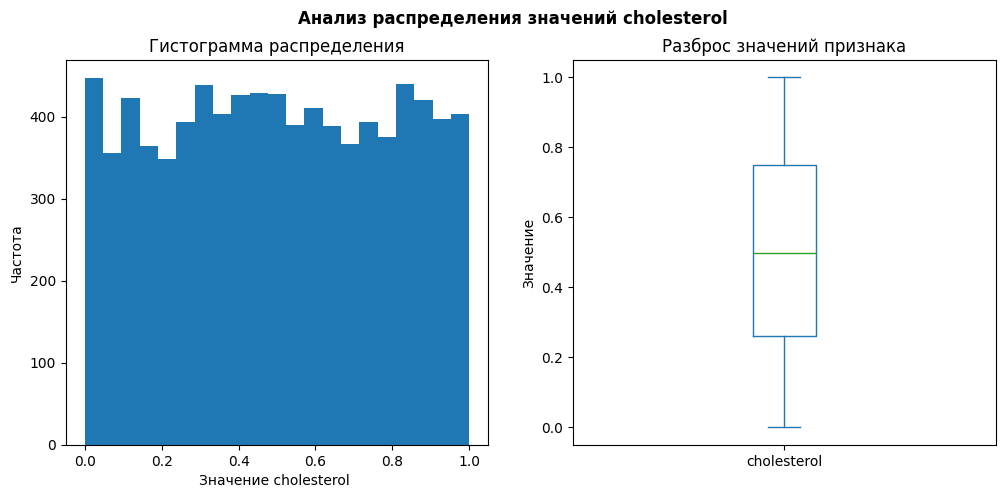


Описательная статистика cholesterol:
count   8_442.0000
mean        0.5011
std         0.2888
min         0.0000
25%         0.2607
50%         0.4964
75%         0.7500
max         1.0000
Name: cholesterol, dtype: float64


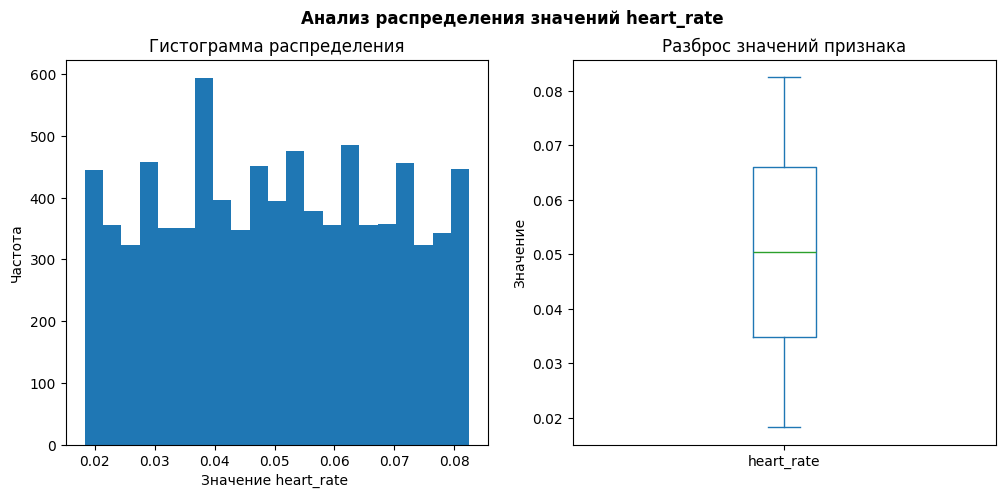


Описательная статистика heart_rate:
count   8_442.0000
mean        0.0502
std         0.0184
min         0.0183
25%         0.0348
50%         0.0504
75%         0.0660
max         0.0825
Name: heart_rate, dtype: float64


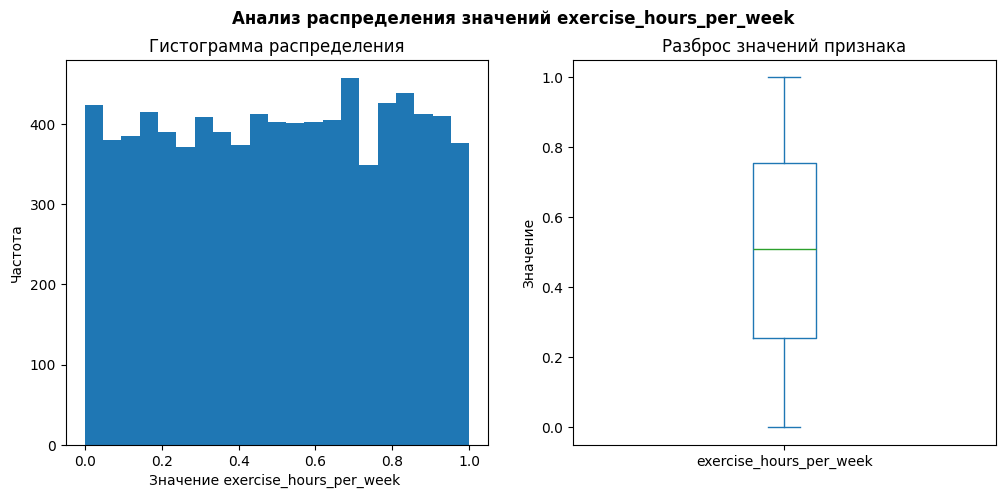


Описательная статистика exercise_hours_per_week:
count   8_442.0000
mean        0.5034
std         0.2889
min         0.0000
25%         0.2534
50%         0.5082
75%         0.7549
max         1.0000
Name: exercise_hours_per_week, dtype: float64


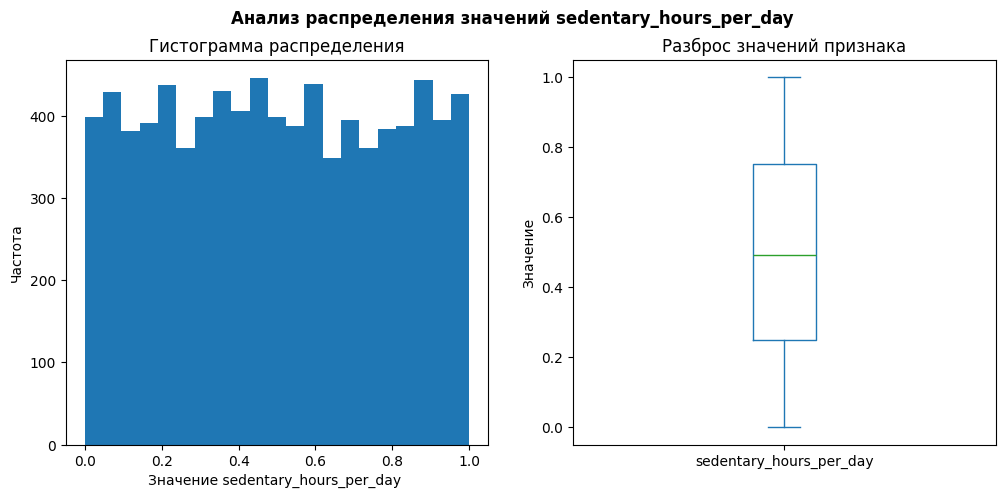


Описательная статистика sedentary_hours_per_day:
count   8_442.0000
mean        0.4991
std         0.2894
min         0.0000
25%         0.2477
50%         0.4927
75%         0.7510
max         1.0000
Name: sedentary_hours_per_day, dtype: float64


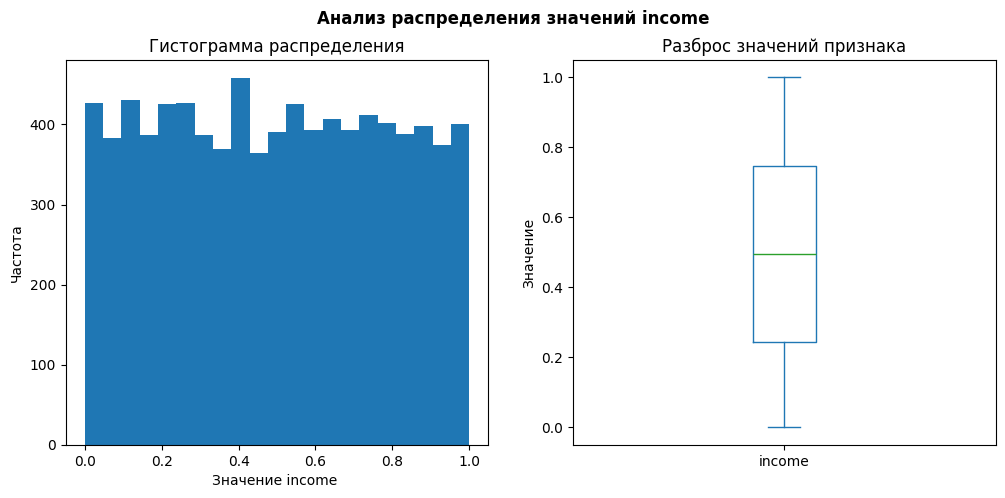


Описательная статистика income:
count   8_442.0000
mean        0.4961
std         0.2888
min         0.0000
25%         0.2446
50%         0.4961
75%         0.7476
max         1.0000
Name: income, dtype: float64


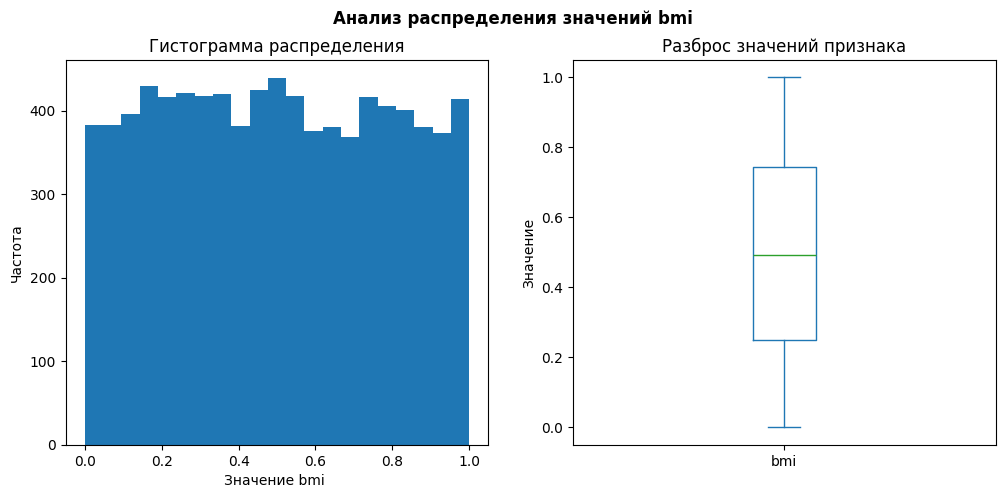


Описательная статистика bmi:
count   8_442.0000
mean        0.4968
std         0.2866
min         0.0000
25%         0.2479
50%         0.4908
75%         0.7444
max         1.0000
Name: bmi, dtype: float64


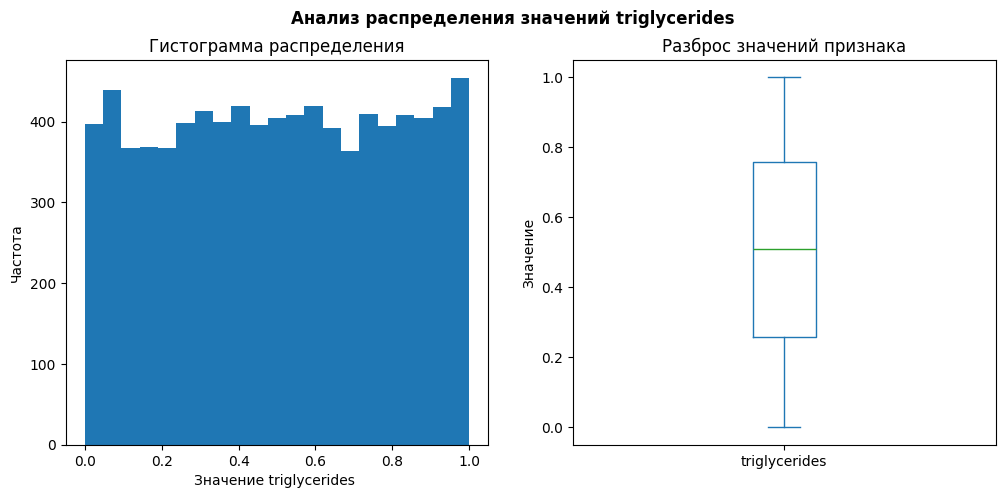


Описательная статистика triglycerides:
count   8_442.0000
mean        0.5055
std         0.2904
min         0.0000
25%         0.2571
50%         0.5078
75%         0.7584
max         1.0000
Name: triglycerides, dtype: float64


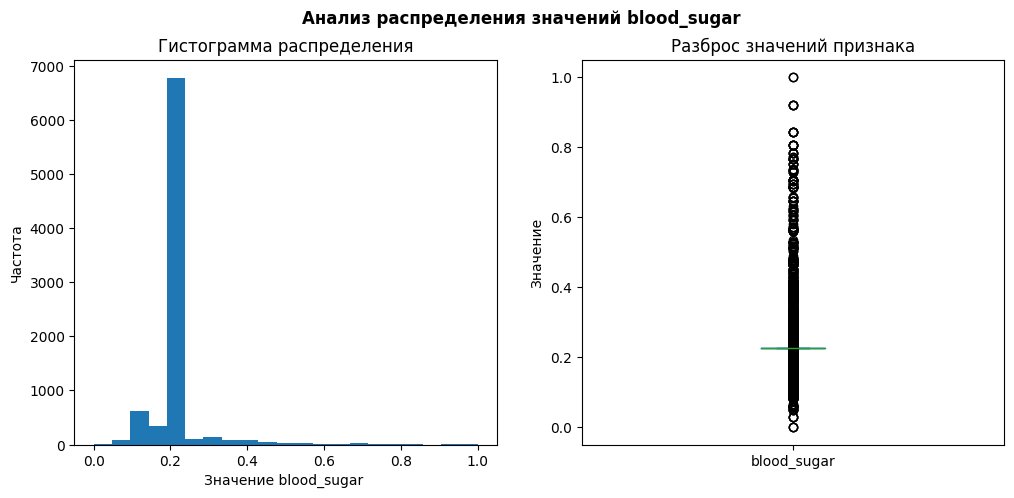


Описательная статистика blood_sugar:
count   8_442.0000
mean        0.2280
std         0.0746
min         0.0000
25%         0.2270
50%         0.2270
75%         0.2270
max         1.0000
Name: blood_sugar, dtype: float64


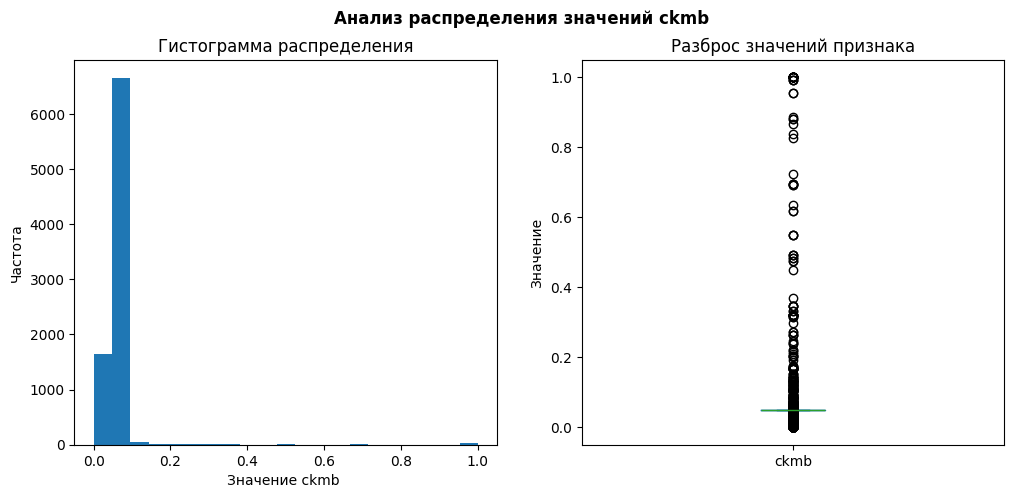


Описательная статистика ckmb:
count   8_442.0000
mean        0.0477
std         0.0704
min         0.0000
25%         0.0482
50%         0.0482
75%         0.0482
max         1.0000
Name: ckmb, dtype: float64


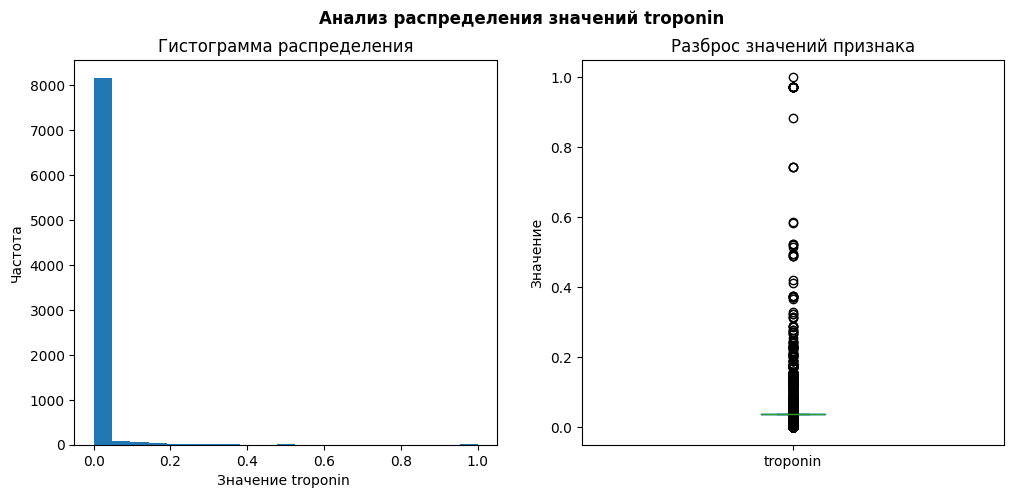


Описательная статистика troponin:
count   8_442.0000
mean        0.0369
std         0.0593
min         0.0000
25%         0.0365
50%         0.0365
75%         0.0365
max         1.0000
Name: troponin, dtype: float64


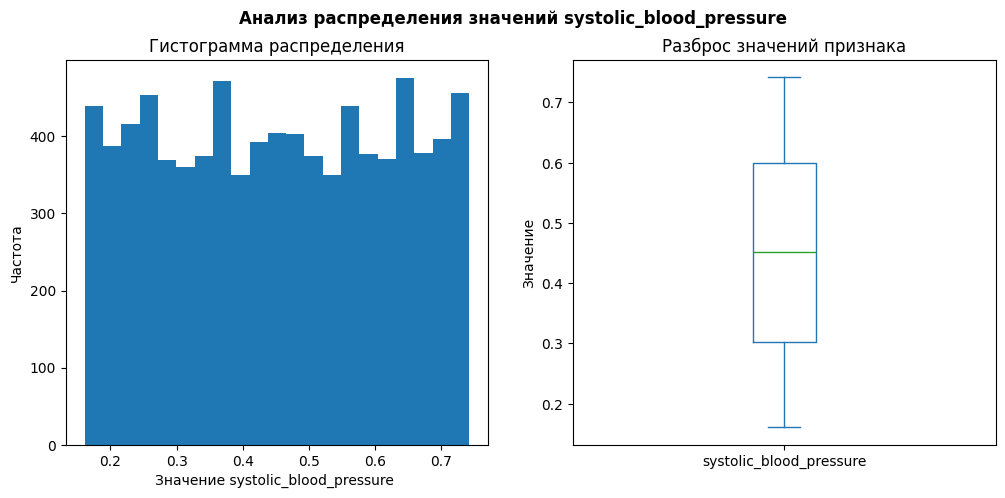


Описательная статистика systolic_blood_pressure:
count   8_442.0000
mean        0.4520
std         0.1702
min         0.1613
25%         0.3032
50%         0.4516
75%         0.6000
max         0.7419
Name: systolic_blood_pressure, dtype: float64


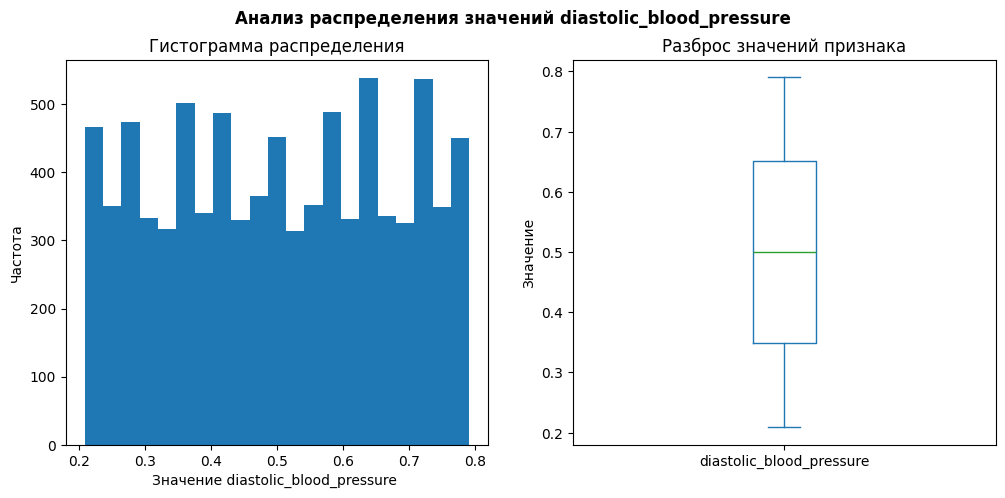


Описательная статистика diastolic_blood_pressure:
count   8_442.0000
mean        0.5017
std         0.1703
min         0.2093
25%         0.3488
50%         0.5000
75%         0.6512
max         0.7907
Name: diastolic_blood_pressure, dtype: float64


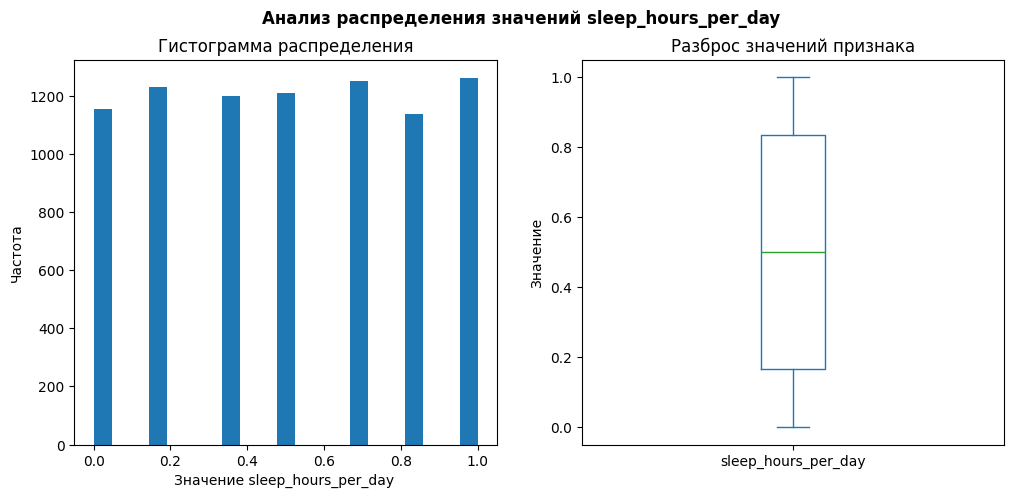


Описательная статистика sleep_hours_per_day:
count   8_442.0000
mean        0.5037
std         0.3327
min         0.0000
25%         0.1667
50%         0.5000
75%         0.8333
max         1.0000
Name: sleep_hours_per_day, dtype: float64


In [37]:
for column in num_columns:
    plot_hist_box(df_clean[column], bins=21)

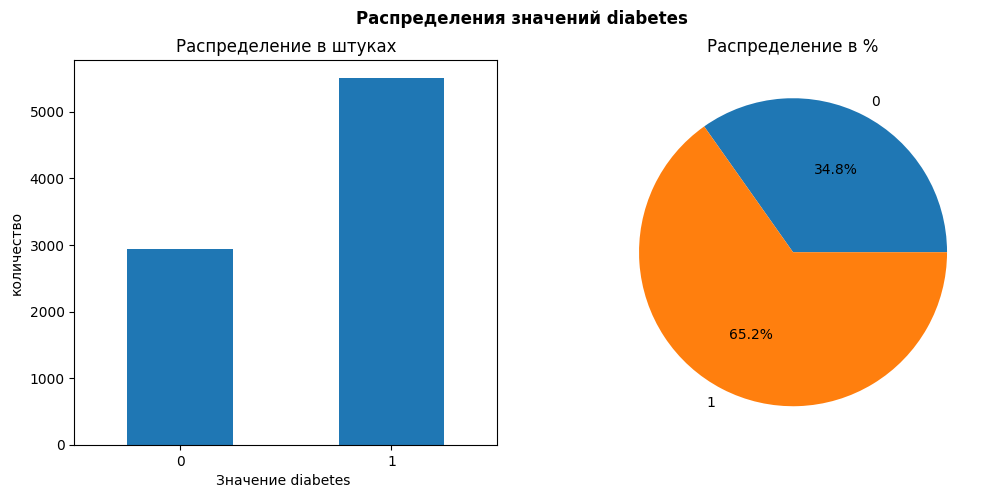


Описательная статистика diabetes:
count   8_442.0000
mean        0.6521
std         0.4763
min         0.0000
25%         0.0000
50%         1.0000
75%         1.0000
max         1.0000
Name: diabetes, dtype: float64


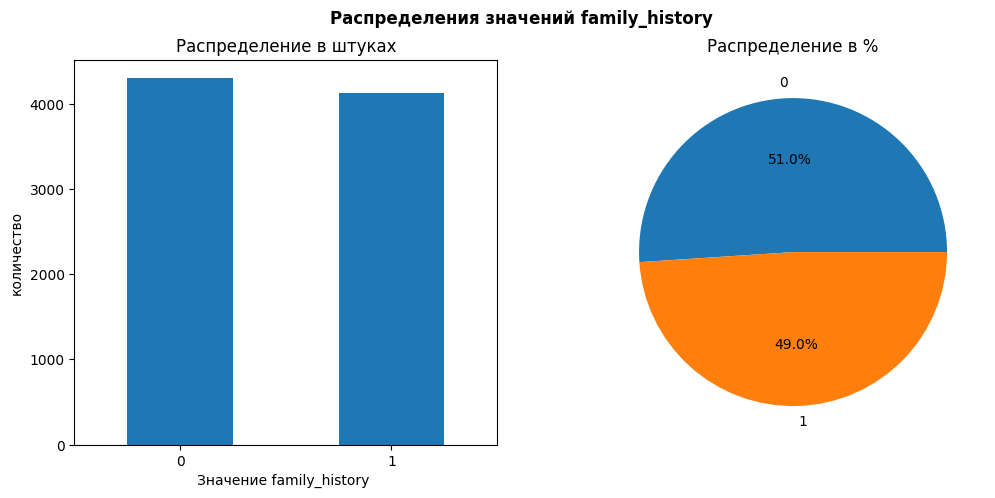


Описательная статистика family_history:
count   8_442.0000
mean        0.4896
std         0.4999
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: family_history, dtype: float64


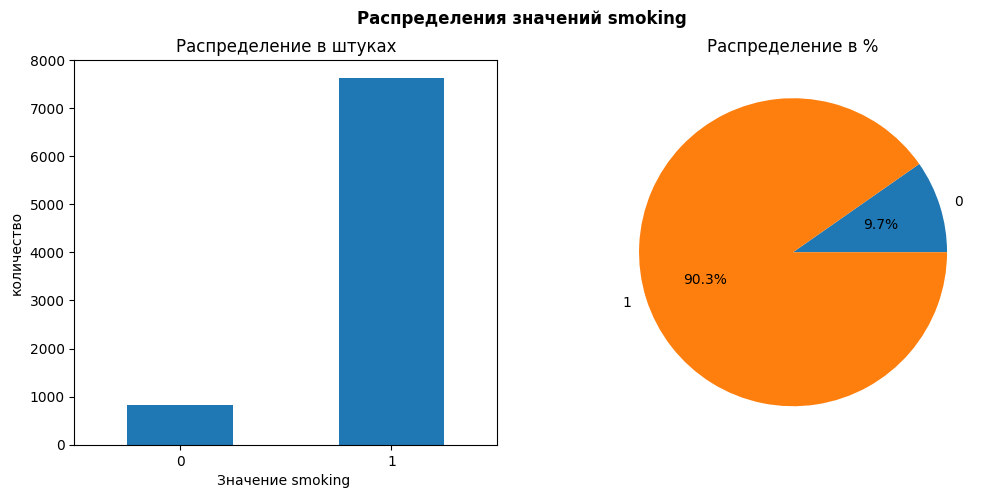


Описательная статистика smoking:
count   8_442.0000
mean        0.9029
std         0.2962
min         0.0000
25%         1.0000
50%         1.0000
75%         1.0000
max         1.0000
Name: smoking, dtype: float64


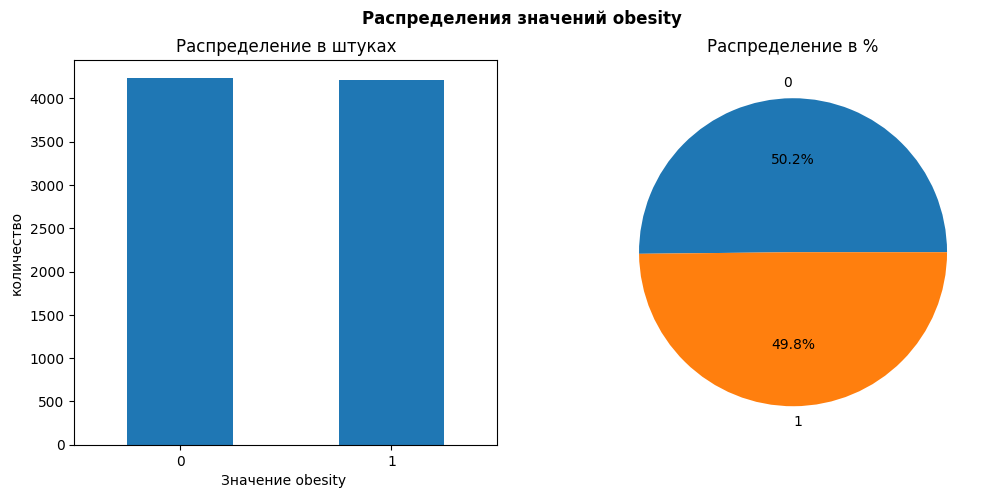


Описательная статистика obesity:
count   8_442.0000
mean        0.4983
std         0.5000
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: obesity, dtype: float64


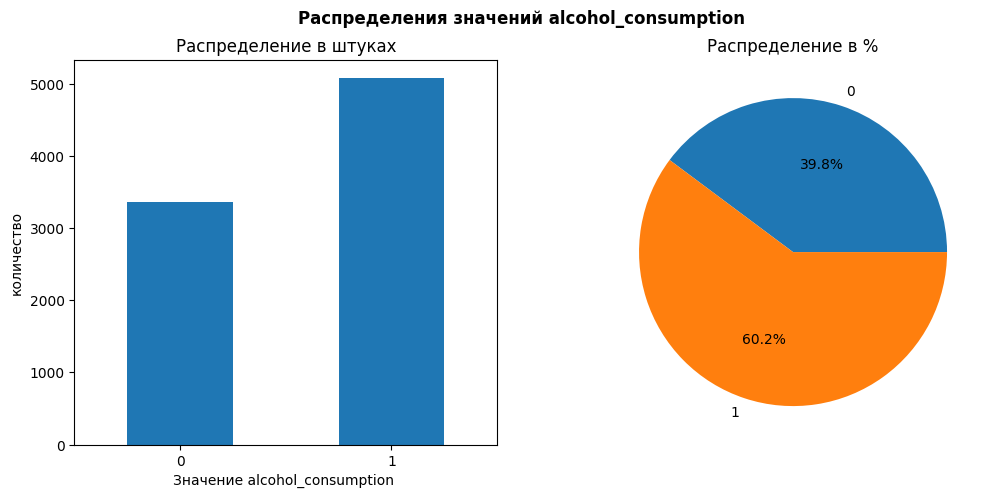


Описательная статистика alcohol_consumption:
count   8_442.0000
mean        0.6020
std         0.4895
min         0.0000
25%         0.0000
50%         1.0000
75%         1.0000
max         1.0000
Name: alcohol_consumption, dtype: float64


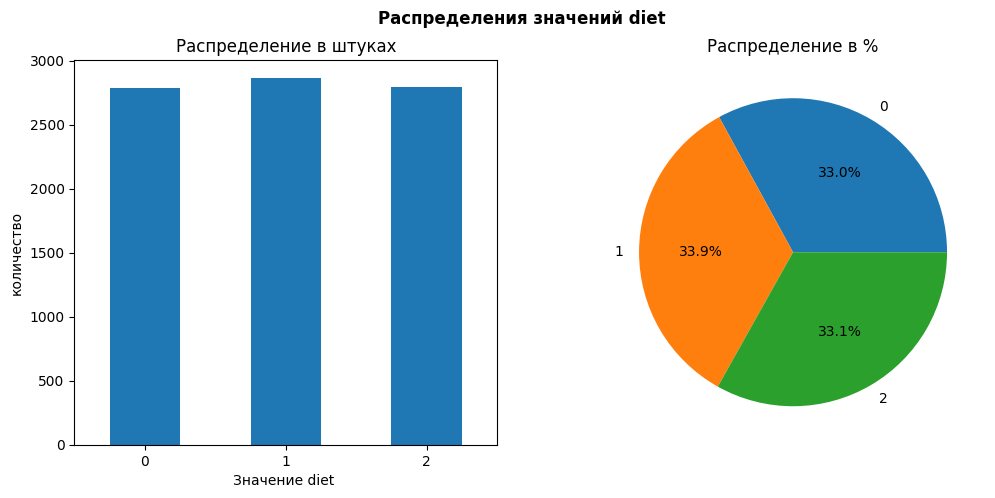


Описательная статистика diet:
count   8_442.0000
mean        1.0015
std         0.8130
min         0.0000
25%         0.0000
50%         1.0000
75%         2.0000
max         2.0000
Name: diet, dtype: float64


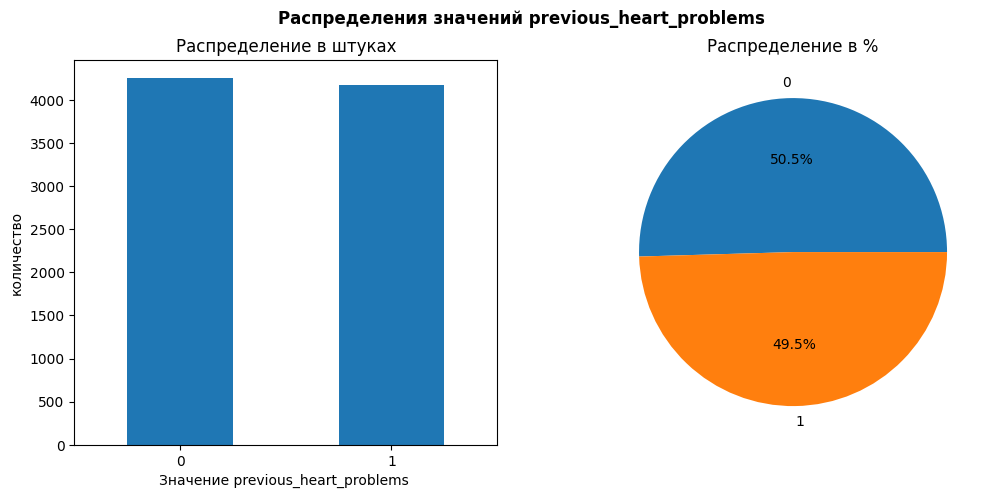


Описательная статистика previous_heart_problems:
count   8_442.0000
mean        0.4954
std         0.5000
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: previous_heart_problems, dtype: float64


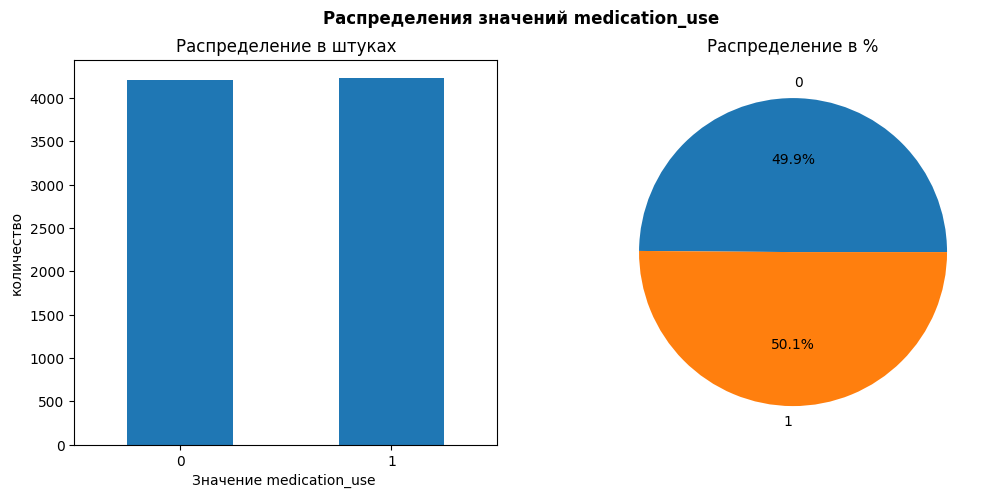


Описательная статистика medication_use:
count   8_442.0000
mean        0.5012
std         0.5000
min         0.0000
25%         0.0000
50%         1.0000
75%         1.0000
max         1.0000
Name: medication_use, dtype: float64


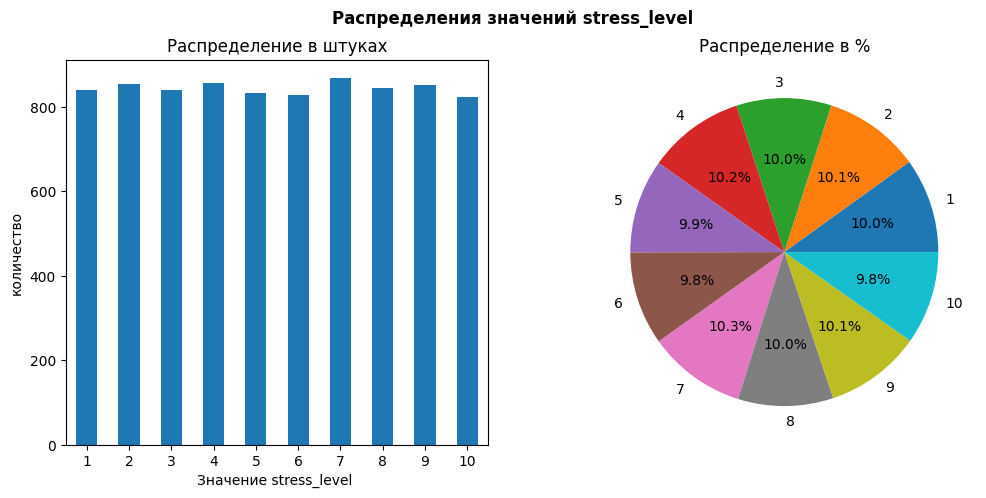


Описательная статистика stress_level:
count   8_442.0000
mean        5.4934
std         2.8679
min         1.0000
25%         3.0000
50%         5.0000
75%         8.0000
max        10.0000
Name: stress_level, dtype: float64


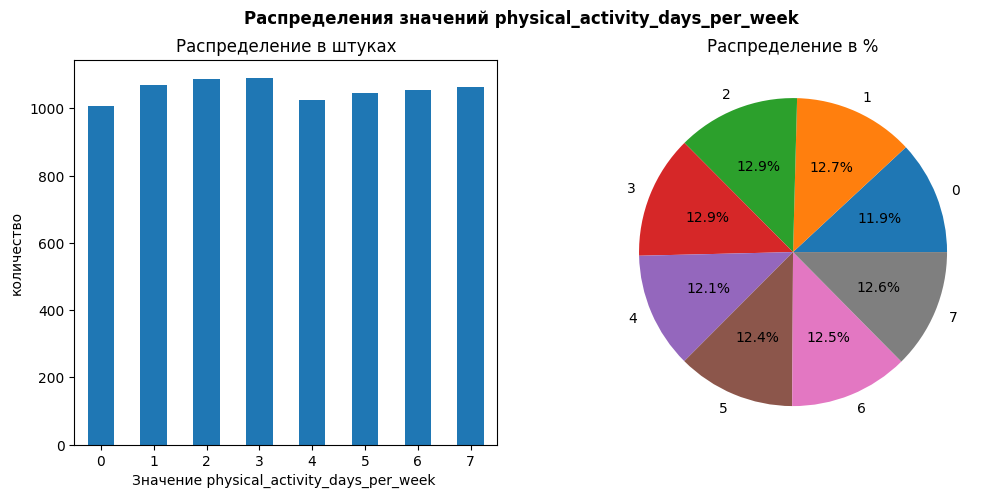


Описательная статистика physical_activity_days_per_week:
count   8_442.0000
mean        3.5083
std         2.2818
min         0.0000
25%         2.0000
50%         3.0000
75%         6.0000
max         7.0000
Name: physical_activity_days_per_week, dtype: float64


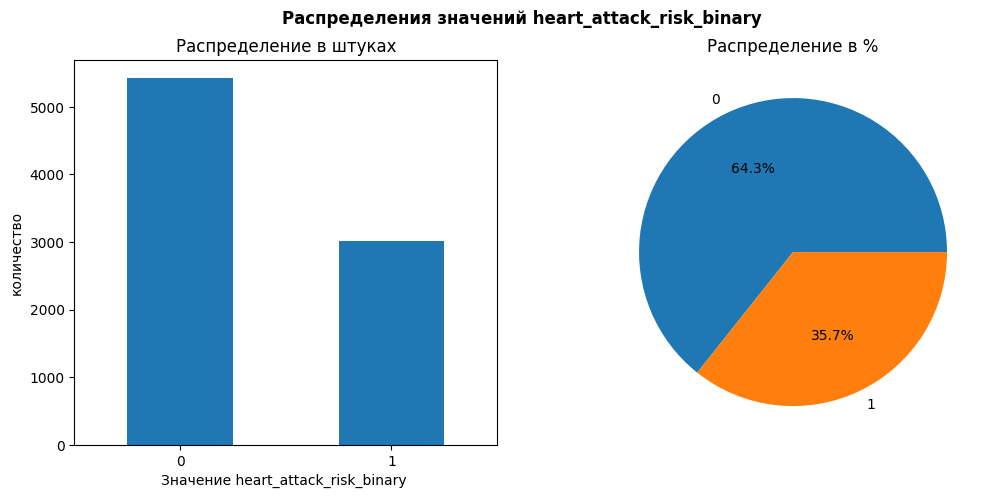


Описательная статистика heart_attack_risk_binary:
count   8_442.0000
mean        0.3569
std         0.4791
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: heart_attack_risk_binary, dtype: float64


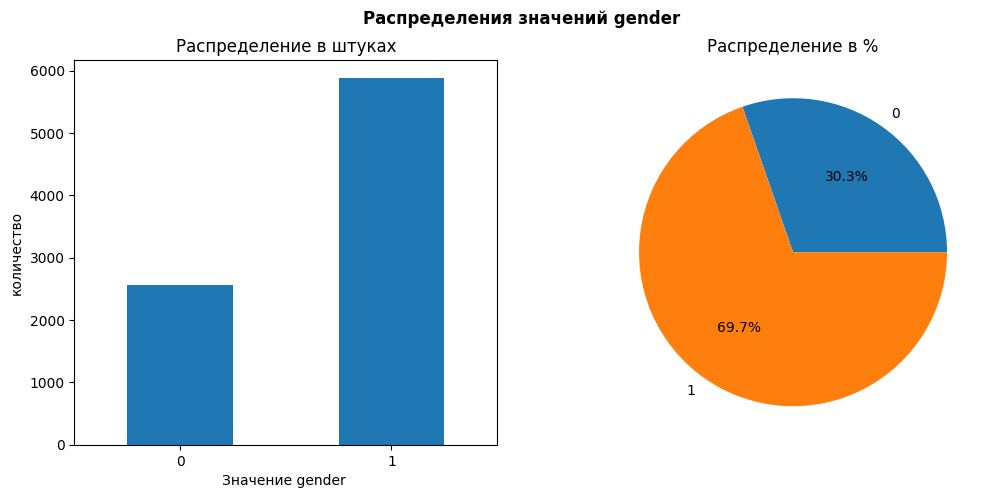


Описательная статистика gender:
count   8_442.0000
mean        0.6968
std         0.4597
min         0.0000
25%         0.0000
50%         1.0000
75%         1.0000
max         1.0000
Name: gender, dtype: float64


In [38]:
for column in cat_columns:
    plot_bar_pie(df_clean[column])

В ходе исследовательского анализа данных установленно, что 2.8% данных в обучающем датасете отличаются по масштабу и набору признаков. Эти данные вносят всплески в непрерывные числовые признаки и неопределенность в категориальные признаки. Скорее всего они присоеденены из другого источника.

### Корреляционный анализ

Проведем корреляционный анализ признаков. Построим матрицу корредяций по всем(колличественным и категориальным) признакам для этого будем использовать phik_matrix из библиотеки phik

In [39]:
interval_cols = [
    'age',
    'cholesterol',
    'heart_rate',
    'exercise_hours_per_week',
    'sedentary_hours_per_day',
    'income',
    'bmi',
    'triglycerides',
    'blood_sugar',
    'ckmb',
    'troponin',
    'systolic_blood_pressure',
    'diastolic_blood_pressure' 
]

In [40]:
#df_full = df_full.drop(columns=['id', 'unnamed_0'])

In [41]:
#df_short = df_short.drop(columns=['id', 'unnamed_0'])

In [42]:
#df_clean = df_clean.drop(columns=['id', 'unnamed_0'])

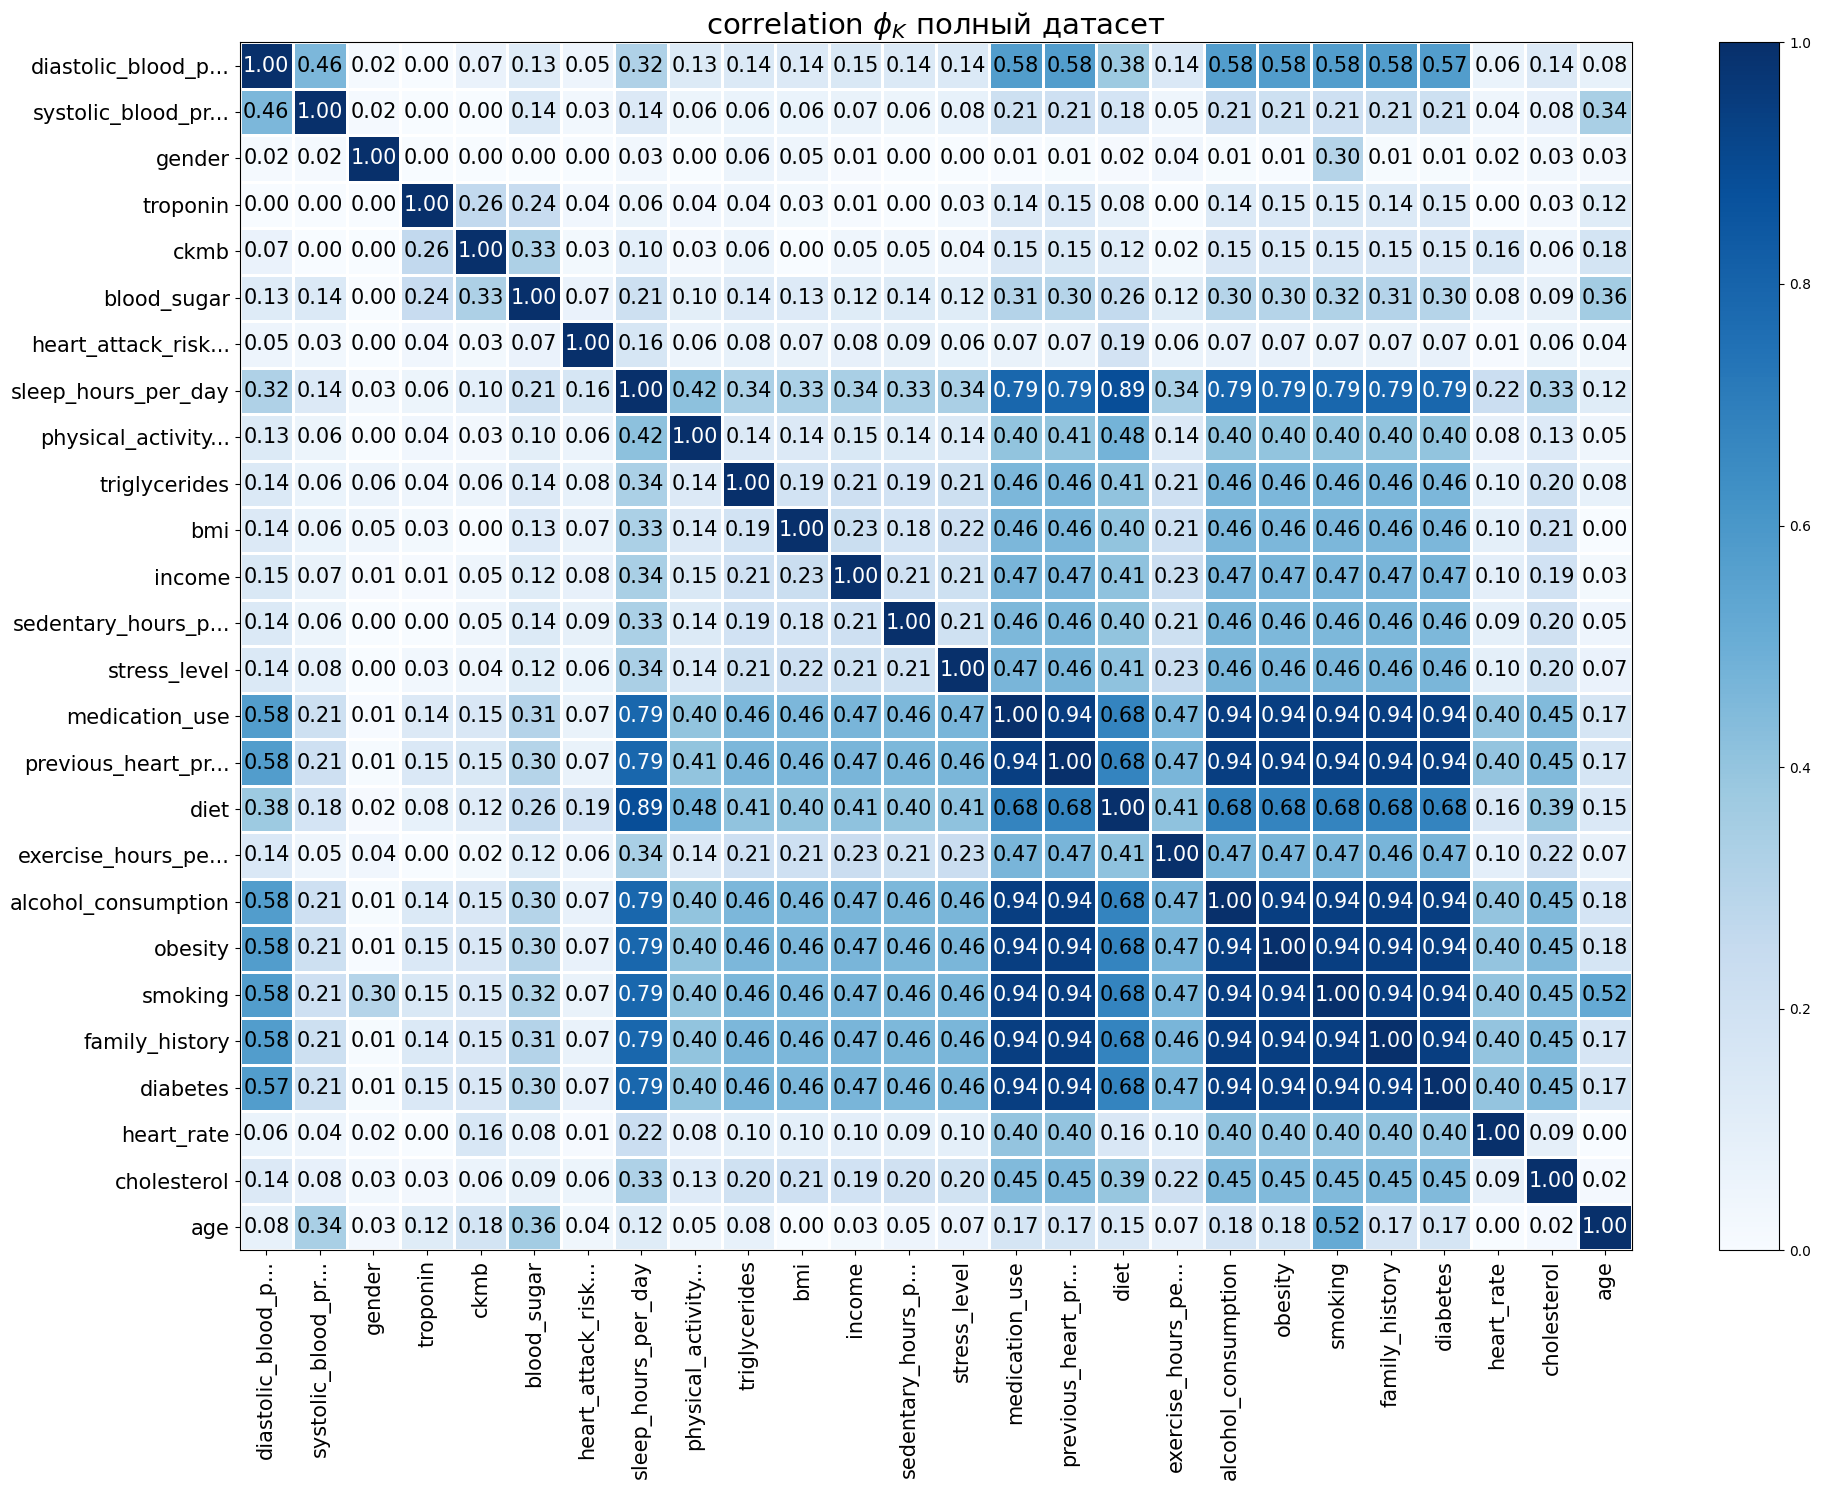

In [43]:
phik_overview = phik_matrix(df_full, interval_cols=interval_cols) 
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Blues',
    title=r'correlation $\phi_K$ полный датасет',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

В датасете с полными данными можем видеть мультиколениарность среди признаков medication_use, previous_heart_problems, alcohol_consumption, obesity, smoking, diabetes, family_history

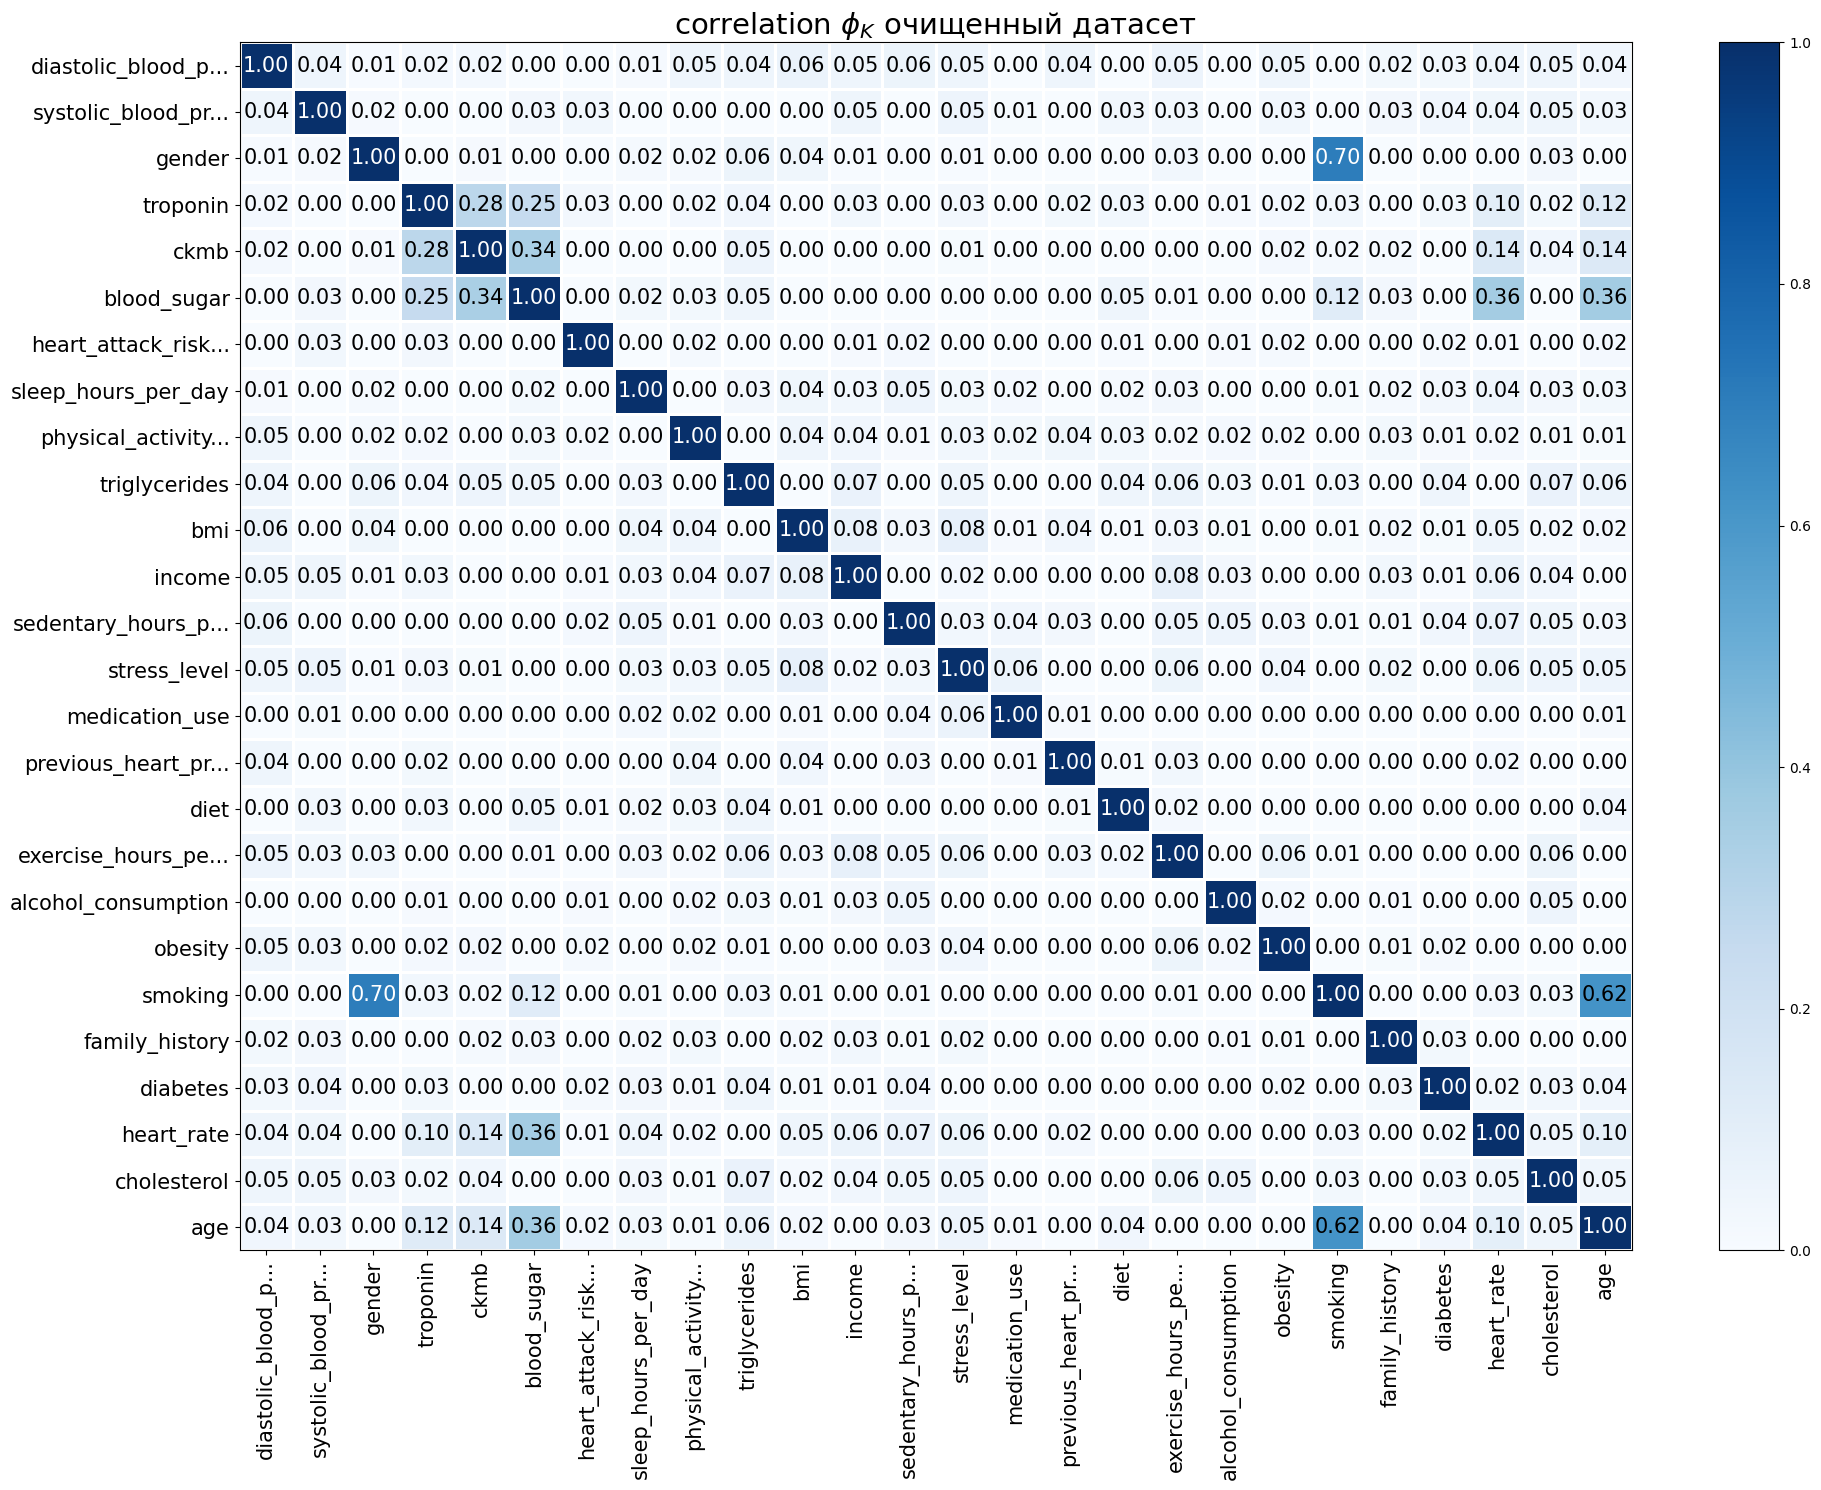

In [44]:
phik_overview = phik_matrix(df_clean, interval_cols=interval_cols) 
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Blues',
    title=r'correlation $\phi_K$ очищенный датасет',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

В очищенном датасете мультиколинеарности не обнаружино. 

In [45]:
df_short = df_short.dropna(axis=1)

In [46]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 9528 to 9555
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       243 non-null    float64
 1   cholesterol               243 non-null    float64
 2   heart_rate                243 non-null    float64
 3   exercise_hours_per_week   243 non-null    float64
 4   diet                      243 non-null    int64  
 5   sedentary_hours_per_day   243 non-null    float64
 6   income                    243 non-null    float64
 7   bmi                       243 non-null    float64
 8   triglycerides             243 non-null    float64
 9   sleep_hours_per_day       243 non-null    float64
 10  heart_attack_risk_binary  243 non-null    float64
 11  blood_sugar               243 non-null    float64
 12  ckmb                      243 non-null    float64
 13  troponin                  243 non-null    float64
 14  gender     

/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable cholesterol for analysis 1. Dropping this column
  warnings.warn(
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable exercise_hours_per_week for analysis 1. Dropping this column
  warnings.warn(
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable sedentary_hours_per_day for analysis 1. Dropping this column
  warnings.warn(
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable income for analysis 1. Dropping this column
  warnings.warn(
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable bmi for analysis 1. Dropping this column
  warn

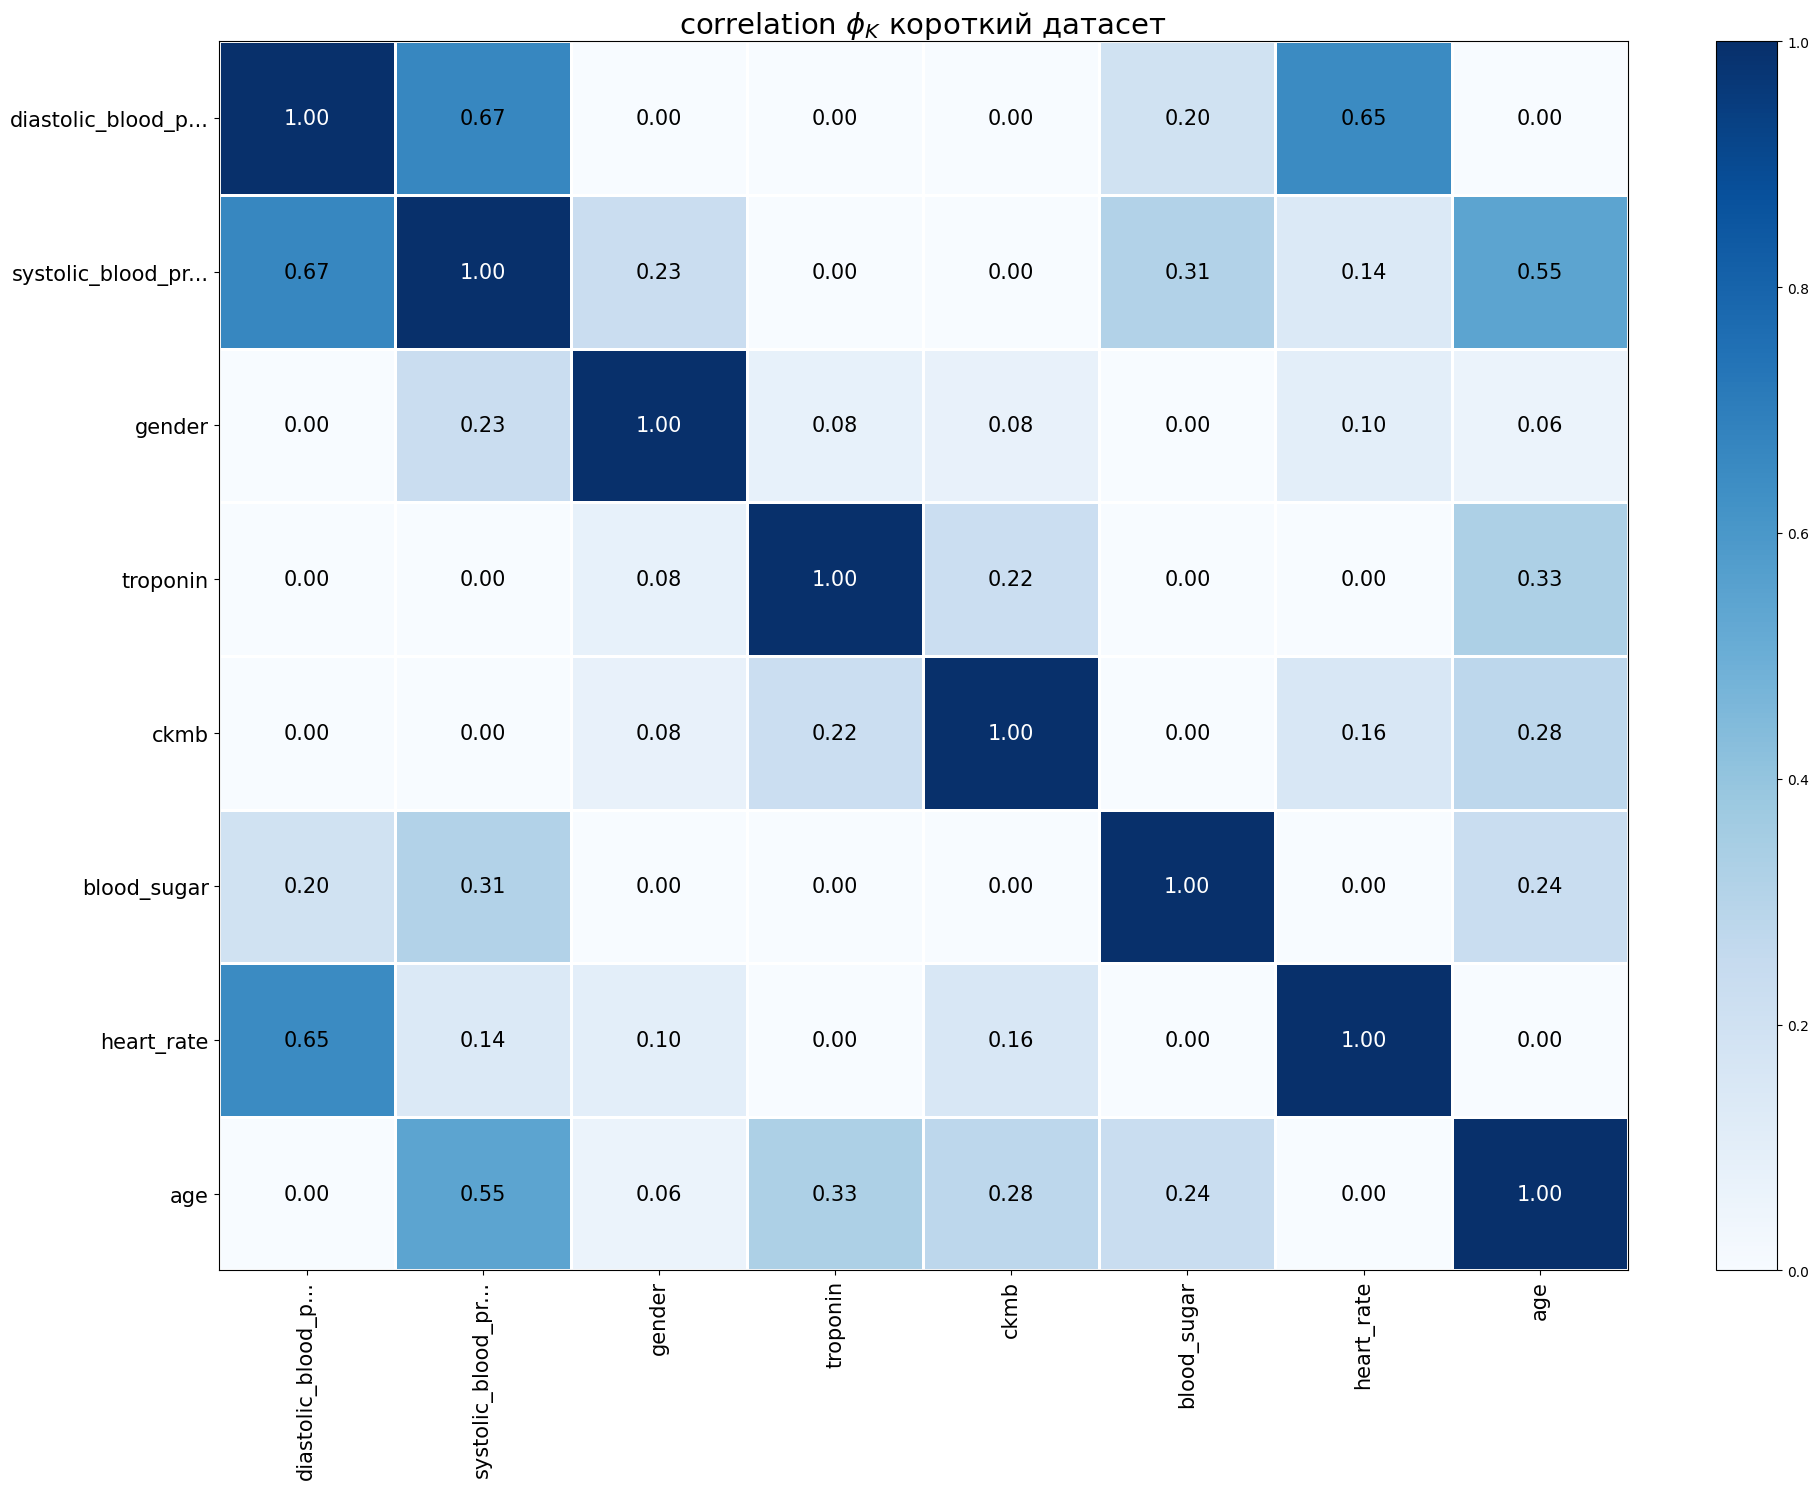

In [47]:
phik_overview = phik_matrix(df_short, interval_cols=interval_cols) 
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Blues',
    title=r'correlation $\phi_K$ короткий датасет',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

В ходе корреляционного анализа установлено, что:
- данные из "другого источника" оказывают  существенное влияние на коэффициенты корреляции, учитывая их иной масштаб
- не обраружина связь между целевым признаком и данными из "другого источника"

Можно сделать вывод, что данные из "другого источника" засоряют наш датасет и их не стоим использвать при обучении модели. При это мы понимаем и принимаем что при равномерном распределении на тренеровочную и тестовую выборки верных предсказаний будет на 2.8% меньше.

Если обучать модель на полных данных, потребуется удалить часть важных признаков по которым выявлена мультиколинеарность. 

## Обучение и проверка моделей

### Выбор метрики

Перед поделью стоит задача определить риск сердечных сзболеваний, при этом не уточнено, имеет ли большую важность найти всех пациентов кто хоть как-то подвержен риску т.е. свести к минимуму ложно положительную ошибку, будем считать, что важность пложительных и отрицательных предсказаний одинаковая. Ктоме того у нас на лицо не сбалансированность данных и наличие выбросов.
Принемая во внимание вышесказанное остановим свой выбор на метрике ROC-AUC.

### Подготовка данных

Подготовку признаков выполним в пайплайне, дополнив пайплайн шагом предобработки. 

In [48]:
def create_pipeline(X_train, X_test, y_train, y_test,
                  ohe_columns=None,
                  ord_columns=None,
                  categories=[]
                 ):
    '''
    Функция создания пайплайна. Принимает разделенные на тренеровочную и
    тестовую выборки, опиционально: 
    - список колонок для OHE кодировария,
    - список колонок для ORD кодирование,
    - список категориальных признаков.
    Возвращает подготовленный пайплай
    '''
    transformers = []
    # создаём списки с названиями признаков
    num_columns = X_train.select_dtypes(include='number').columns.tolist()
    transformers.append(('num', MinMaxScaler(), num_columns))
    # создаём пайплайн для подготовки признаков из списка ohe_columns: 
    #заполнение пропусков и OHE-кодирование
    # SimpleImputer + OHE
    if ohe_columns:
        ohe_pipe = Pipeline(
            [('simple_imputer_ohe', SimpleImputer(missing_values=np.nan,
                                                  strategy='most_frequent')),
             ('ohe', OneHotEncoder(drop='first',
                                   handle_unknown='ignore',
                                   sparse_output=False))
            ]
            )
        transformers.append(('ohe', ohe_pipe, ohe_columns))
    # создаём пайплайн для подготовки признаков из списка ord_columns: 
    # заполнение пропусков и Ordinal-кодирование
    # SimpleImputer + OE
    if ord_columns:
        ord_pipe = Pipeline(
            [('simple_imputer_before_ord', SimpleImputer(
                missing_values=np.nan, strategy='most_frequent')
             ),
             ('ord',  OrdinalEncoder(
                        categories=categories, 
                        handle_unknown='use_encoded_value',
                        unknown_value=np.nan
                    )
             ),
             ('simple_imputer_after_ord', SimpleImputer(
                 missing_values=np.nan,
                 strategy='most_frequent')
             )
            ]
        )
        transformers.append(('ord', ord_pipe, ord_columns))    
    # создаём объедененный пайплайн для подготовки данных ColumnTransformer
    data_preprocessor = ColumnTransformer(
        transformers, 
        remainder='passthrough'
    )
    # создаём базовый пайплайн: подготовка данных и модель
    pipeline = Pipeline([
        ('preprocessor', data_preprocessor),
        ('models', LogisticRegression())
       # ('models', LinearRegression())
    ])
    return pipeline

In [62]:
def split_data(df, 
               target_attr,
               random_state=RANDOM_STATE,
               test_size=TEST_SIZE):
    '''
    Принемает датафрейм, целевой признак, random_state, test_size
    возвращает разделенный на тренеровочную и тестовую выборки.
    '''

    # делим данные на входные и целевые
    X = df.drop([target_attr], axis=1)
    y = df[target_attr]
    # делим данные на тренировочные и тестовые
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )
    return X_train, X_test, y_train, y_test

In [50]:
# Собираем датафреймы в словарь ключи - имена датафреймов
df_to_fit = {
    'df_full': df_full,
    'df_clean': df_clean
}

In [51]:
# Целевой признак
target_attr = 'heart_attack_risk_binary'

#Создаем пустые словари
pipelines = {}
X_trains = {}
X_tests = {}
y_trains = {}
y_tests = {}
X_tests_id = {}
#Заполняем их в цикле
for name, df in df_to_fit.items():
    X_trains[name], X_tests[name], y_trains[name], y_tests[name] = (
        #split_data(df.drop('id', axis=1), 'product'))
        split_data(df, target_attr, ))
    X_trains[name] = df.drop([target_attr], axis=1)
    y_trains[name] = df[target_attr]
    #сохраняем id для последующего объедениения с предсказаниями
    #X_tests_id[name] = X_tests[name]['id']
    #X_trains[name] = X_trains[name].drop('id', axis=1)
    #X_tests_id[name].reset_index(drop=True, inplace=True)
    #X_tests[name].reset_index(drop=True, inplace=True)
    #y_tests[name].reset_index(drop=True, inplace=True)
    pipelines[name] = create_pipeline(
        X_trains[name], X_tests[name], y_trains[name], y_tests[name])

In [52]:
#to_snake_case(df_heart_test).drop(['id', 'unnamed_0'], axis=1)

### Обучение моделей, выбор лучшей модели

### Обучение моделей

Обучим модели в качестве базовой модели будем использовать модель линейной регрессии LinearRegression

Выберим лучшую модель и проверим её качество на основе метрики ROC-AUC

In [53]:
# Создаем список словарей с параметрами моделей для param_distributions
param_distributions = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 24),
        'models__max_features': range(2, 24),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        #'models__n_neighbors': range(10, 30),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
        #    solver='liblinear', 
        #    penalty='l1'
        )],
        #'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'models__degree': range(3, 8),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    # словарь для модели CatBoostClassifier()
    {
        'models': [CatBoostClassifier(
            random_state=RANDOM_STATE,
            iterations=100,
            depth=5,
            learning_rate=0.1,
            loss_function='Logloss',
            verbose=False
        )],
        'preprocessor__num': ['passthrough']
    }
]

In [54]:
param_distributions_cat = [
    {
        'models': [CatBoostClassifier(
            random_state=RANDOM_STATE,
            #depth=10,
            learning_rate=0.1,
            loss_function='Logloss',
            verbose=False
        )],
        'models__depth': [10,],
        'models__iterations': [500,],
        'preprocessor__num': ['passthrough']
    }

]

In [55]:
# Для каждого датасета подбираем лучшую модель. 
# Сохраняем лучшую модеь, ее параметры, метрику и результаты крос валидации
best_models = {}
models_search = {}
for name, pipeline in pipelines.items():
    models_search[name] = RandomizedSearchCV(
        pipeline, 
        param_distributions, 
        cv=5,
        scoring='roc_auc',
        n_iter=30,
        n_jobs=-1,
    )
    models_search[name].fit(X_trains[name], y_trains[name])
    best_params = models_search[name].best_params_
    best_score = models_search[name].best_score_
    best_estimator = models_search[name].best_estimator_
    best_cv_results = models_search[name].cv_results_
    best_models[name] = {
        'best_params': best_params,
        'best_score': best_score,
        'best_estimator': best_estimator,
        'best_cv_results': best_cv_results
    }

Выбор модели CatBoost запустим в отдельном пайплайне

In [56]:
# Для каждого датасета подбираем лучшую модель СatBoost(). 
# Сохраняем лучшую модеь, ее параметры, метрику и результаты крос валидации
best_models_cat = {}
models_search_cat = {}
for name, pipeline in pipelines.items():
    models_search[name] = GridSearchCV(
        pipeline, 
        param_distributions_cat, 
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
    )
    models_search[name].fit(X_trains[name], y_trains[name])
    best_params = models_search[name].best_params_
    best_score = models_search[name].best_score_
    best_estimator = models_search[name].best_estimator_
    best_cv_results = models_search[name].cv_results_
    best_models_cat[name] = {
        'best_params': best_params,
        'best_score': best_score,
        'best_estimator': best_estimator,
        'best_cv_results': best_cv_results
    }

In [57]:
# Для каждого датасета выводим лучшую модель, ее параметры, метрику,
# и результаты крос валидации
for name, best_model in best_models.items():
    print(f'Лучшая модель для {name} и её параметры: '
          f'{best_model["best_params"]} \n')
    print(f'Метрика лучшей модели на тренировочной выборке:'
          f'{best_model["best_score"]:.4f} \n')
    df_results = pd.DataFrame(best_model['best_cv_results'])
    display(df_results.sort_values('rank_test_score').head())

Лучшая модель для df_full и её параметры: {'preprocessor__num': StandardScaler(), 'models__kernel': 'poly', 'models__degree': 7, 'models': SVC(probability=True, random_state=42)} 

Метрика лучшей модели на тренировочной выборке:0.5559 



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19         5.7713        1.4293           0.1675          0.0181   
28         0.1059        0.0297           0.0043          0.0038   
11         0.0756        0.0116           0.0040          0.0018   
13         0.0767        0.0093           0.0047          0.0023   
17         0.0599        0.0059           0.0030          0.0008   

   param_preprocessor__num  param_models__max_features  \
19        StandardScaler()                         NaN   
28             passthrough                     15.0000   
11             passthrough                     20.0000   
13             passthrough                     19.0000   
17          MinMaxScaler()                     10.0000   

    param_models__max_depth                             param_models  \
19                      NaN   SVC(probability=True, random_state=42)   
28                  22.0000  DecisionTreeClassifier(random_state=42)   
11                  13.0000  DecisionTreeClassifier(random_state=42)   
13                  13.0000  DecisionTreeClassifier(random_state=42)   
17                  21.0000  DecisionTreeClassifier(random_state=42)   

   param_models__kernel  param_models__degree  \
19                 poly                7.0000   
28                  NaN                   NaN   
11                  NaN                   NaN   
13                  NaN                   NaN   
17                  NaN                   NaN   

                                                                                                                                           params  \
19       {'preprocessor__num': StandardScaler(), 'models__kernel': 'poly', 'models__degree': 7, 'models': SVC(probability=True, random_state=42)}   
28   {'preprocessor__num': 'passthrough', 'models__max_features': 15, 'models__max_depth': 22, 'models': DecisionTreeClassifier(random_state=42)}   
11   {'preprocessor__num': 'passthrough', 'models__max_features': 20, 'models__max_depth': 13, 'models': DecisionTreeClassifier(random_state=42)}   
13   {'preprocessor__num': 'passthrough', 'models__max_features': 19, 'models__max_depth': 13, 'models': DecisionTreeClassifier(random_state=42)}   
17  {'preprocessor__num': MinMaxScaler(), 'models__max_features': 10, 'models__max_depth': 21, 'models': DecisionTreeClassifier(random_state=42)}   

    split0_test_score  split1_test_score  split2_test_score  \
19             0.5507             0.5583             0.5401   
28             0.5685             0.5497             0.5499   
11             0.5450             0.5204             0.5429   
13             0.5351             0.5275             0.5484   
17             0.5391             0.5499             0.5294   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
19             0.5750             0.5554           0.5559          0.0114   
28             0.5433             0.5144           0.5452          0.0175   
11             0.5522             0.5600           0.5441          0.0133   
13             0.5464             0.5571           0.5429          0.0104   
17             0.5609             0.5348           0.5428          0.0113   

    rank_test_score  
19                1  
28                2  
11                3  
13                4  
17                5

Лучшая модель для df_clean и её параметры: {'preprocessor__num': StandardScaler(), 'models__max_features': 9, 'models__max_depth': 20, 'models': DecisionTreeClassifier(random_state=42)} 

Метрика лучшей модели на тренировочной выборке:0.5392 



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3          0.1163        0.0845           0.0117          0.0089   
16         0.1745        0.1067           0.0090          0.0109   
29         0.1112        0.0111           0.0043          0.0018   
14         0.1273        0.0933           0.0114          0.0128   
21         0.0937        0.0109           0.0081          0.0031   

   param_preprocessor__num  param_models__max_features  \
3         StandardScaler()                      9.0000   
16             passthrough                     18.0000   
29          MinMaxScaler()                     23.0000   
14          MinMaxScaler()                     19.0000   
21          MinMaxScaler()                     22.0000   

    param_models__max_depth                             param_models  \
3                   20.0000  DecisionTreeClassifier(random_state=42)   
16                  22.0000  DecisionTreeClassifier(random_state=42)   
29                  20.0000  DecisionTreeClassifier(random_state=42)   
14                  11.0000  DecisionTreeClassifier(random_state=42)   
21                  14.0000  DecisionTreeClassifier(random_state=42)   

   param_models__kernel  param_models__degree  \
3                   NaN                   NaN   
16                  NaN                   NaN   
29                  NaN                   NaN   
14                  NaN                   NaN   
21                  NaN                   NaN   

                                                                                                                                            params  \
3   {'preprocessor__num': StandardScaler(), 'models__max_features': 9, 'models__max_depth': 20, 'models': DecisionTreeClassifier(random_state=42)}   
16    {'preprocessor__num': 'passthrough', 'models__max_features': 18, 'models__max_depth': 22, 'models': DecisionTreeClassifier(random_state=42)}   
29   {'preprocessor__num': MinMaxScaler(), 'models__max_features': 23, 'models__max_depth': 20, 'models': DecisionTreeClassifier(random_state=42)}   
14   {'preprocessor__num': MinMaxScaler(), 'models__max_features': 19, 'models__max_depth': 11, 'models': DecisionTreeClassifier(random_state=42)}   
21   {'preprocessor__num': MinMaxScaler(), 'models__max_features': 22, 'models__max_depth': 14, 'models': DecisionTreeClassifier(random_state=42)}   

    split0_test_score  split1_test_score  split2_test_score  \
3              0.5569             0.5374             0.5174   
16             0.5303             0.5293             0.5365   
29             0.5481             0.5247             0.5122   
14             0.5302             0.5248             0.5487   
21             0.5382             0.4956             0.5180   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
3              0.5620             0.5225           0.5392          0.0178   
16             0.5002             0.5587           0.5310          0.0187   
29             0.5341             0.5247           0.5288          0.0119   
14             0.5044             0.5343           0.5285          0.0144   
21             0.5324             0.5530           0.5274          0.0195   

    rank_test_score  
3                 1  
16                2  
29                3  
14                4  
21                5

In [58]:
# Для каждого датасета выводим лучшую модель, ее параметры, метрику,
# и результаты крос валидации
for name, best_model in best_models_cat.items():
    print(f'Лучшая модель для {name} и её параметры: '
          f'{best_model["best_params"]} \n')
    print(f'Метрика лучшей модели на тренировочной выборке:'
          f'{best_model["best_score"]:.4f} \n')
    df_results = pd.DataFrame(best_model['best_cv_results'])
    display(df_results.sort_values('rank_test_score').head())

Лучшая модель для df_full и её параметры: {'models': <catboost.core.CatBoostClassifier object at 0x14bce85d0>, 'models__depth': 10, 'models__iterations': 500, 'preprocessor__num': 'passthrough'} 

Метрика лучшей модели на тренировочной выборке:0.5937 



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        11.6711        0.0500           0.0196          0.0075   

                                               param_models  \
0  <catboost.core.CatBoostClassifier object at 0x14bce85d0>   

   param_models__depth  param_models__iterations param_preprocessor__num  \
0                   10                       500             passthrough   

                                                                                                                                                     params  \
0  {'models': <catboost.core.CatBoostClassifier object at 0x14bce85d0>, 'models__depth': 10, 'models__iterations': 500, 'preprocessor__num': 'passthrough'}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0             0.5912             0.5853             0.5956             0.6030   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.5932           0.5937          0.0058                1

Лучшая модель для df_clean и её параметры: {'models': <catboost.core.CatBoostClassifier object at 0x14bce85d0>, 'models__depth': 10, 'models__iterations': 500, 'preprocessor__num': 'passthrough'} 

Метрика лучшей модели на тренировочной выборке:0.5857 



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        15.6816        0.0482           0.0227          0.0086   

                                               param_models  \
0  <catboost.core.CatBoostClassifier object at 0x14bce85d0>   

   param_models__depth  param_models__iterations param_preprocessor__num  \
0                   10                       500             passthrough   

                                                                                                                                                     params  \
0  {'models': <catboost.core.CatBoostClassifier object at 0x14bce85d0>, 'models__depth': 10, 'models__iterations': 500, 'preprocessor__num': 'passthrough'}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0             0.5757             0.5774             0.5999             0.5876   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.5877           0.5857          0.0087                1

In [59]:
# делаем предсказания на валидационной выборке 
y_predictions = {}
roc_aucs = {}
predictions = {}
for name, model in best_models.items():
    # Получение препроцессора из пайплайна
    preprocessor = model['best_estimator'].named_steps[
        'preprocessor']
    # Подготовка данных X_test   
    X_test_preproc = preprocessor.transform(
        X_tests[name])
    # Получение модели из пайплайна
    best_estimator = model['best_estimator'].named_steps['models'] 
    # Предсказания 
    y_predictions[name] = best_estimator.predict(
        X_test_preproc)
    # ROC-AUC для валидационной выборки
    roc_aucs[name] = (roc_auc_score(
        y_tests[name],
        y_predictions[name]
    ))
    
    # Объединение y_predictions и X_test_id
    y_predictions[name] = pd.Series(y_predictions[name])
    predictions[name] = pd.concat([
        #X_tests_id[name],
        X_tests[name],
        y_predictions[name]
    ],
        axis=1
    )
    #predictions[name].columns = ['id','product_fact', 'product_predict']
    #print(f'Коэффициенты модели {name}: {best_estimator.coef_}')
    #print(f'Среднее значение предсказанного product для {name}: ' 
    #      f'{mean_products[name]:.4f}')
    print(f'ROC-AUC для {name}: ' 
          f'{roc_aucs[name]:.4f}')
    print(model['best_estimator'].named_steps['models'] )
    print(f'{"-" * 70} \n')
for name, model in best_models_cat.items():
    # Получение препроцессора из пайплайна
    preprocessor = model['best_estimator'].named_steps[
        'preprocessor']
    # Подготовка данных X_test   
    X_test_preproc = preprocessor.transform(
        X_tests[name])
    # Получение модели из пайплайна
    best_estimator = model['best_estimator'].named_steps['models'] 
    # Предсказания 
    y_predictions[name] = best_estimator.predict(
        X_test_preproc)
    # ROC-AUC для валидационной выборки
    roc_aucs[name] = (roc_auc_score(
        y_tests[name],
        y_predictions[name]
    ))
    
    print(f'ROC-AUC для {name}: ' 
          f'{roc_aucs[name]:.4f}')
    print(model['best_estimator'].named_steps['models'] )
    print(f'{"-" * 70} \n')

ROC-AUC для df_full: 0.5986
SVC(degree=7, kernel='poly', probability=True, random_state=42)
---------------------------------------------------------------------- 

ROC-AUC для df_clean: 0.9104
DecisionTreeClassifier(max_depth=20, max_features=9, random_state=42)
---------------------------------------------------------------------- 

ROC-AUC для df_full: 1.0000
---------------------------------------------------------------------- 

ROC-AUC для df_clean: 1.0000
---------------------------------------------------------------------- 



Предсказания на тестовой выборке

In [60]:
X_test = to_snake_case(df_heart_test).drop(['id', 'unnamed_0'], axis=1)


In [61]:
best_models['df_full']
# Получение препроцессора из пайплайна
model = best_models['df_full']
preprocessor = model['best_estimator'].named_steps[
        'preprocessor']
X_test_preproc = preprocessor.transform(
        X_test)

ValueError: could not convert string to float: 'Male'

In [ ]:
y_pred = model_search_quit.best_estimator_.predict_proba(X_test)[:,1]

In [ ]:
# Предсказания для тестовой выборке


## Анализ важности признаков

## Общий вывод